
Assignment 2
1.Name: Vaishnavi Bhoite

2.NUID: 002776319

Abstract:
In this assignment,an AutoML library like H2O.ai is used to create predictive models and interpret them.Automactic Machine Learning or AutoML refers to the automation of various tasks in the machine learning pipeline, including data preprocessing, hyperparameter tuning, model selection, and evaluation.Over the time, people have collected the sensory data on quality wine in terms of few attributes. 
Access to clean drinking water is crucial for health, a fundamental human right, and a component of successful health security policies. On a national, regional, and local level, this is significant as a health and development problem. Investments in water supply and sanitation have been shown to produce a positive economic benefit in some areas because they reduce negative health effects and medical expenses more than they cost to implement.
Here, in this assignment we will be using that dataset to train machine learning models and make a fresh predictions on a new set of data, to help people access the potability of water with the given set of attributes.

Dataset:
this dataset has a  water_potability.csv file which contains water quality metrics for 3276 different water bodies.

Content: 
1. ph Value: When assessing the acid-base equilibrium of water, PH is a key factor. Additionally, it shows whether the water is acidic or neutral. The highest pH allowed range, according to WHO, is between 6.5 and 8.5. The present investigation's ranges fell between 6.52 and 6.83, which is within WHO standards.

2. Hardness: Salts made of calcium and magnesium are the primary culprits in hardness. These salts are released from the geologic layers that water passes through. How long water is exposed to a hardness-producing substance influences how hard the water is when it is in its natural state. The ability of water to form soap due to calcium and magnesium precipitation was the initial definition of hardness.

3. Solids(Total dissolved solids -TDS):Numerous inorganic and some organic elements or salts, including potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates, and others, can be dissolved by water. These minerals gave the water an undesirable flavor and diluted hue. This is a crucial variable when using water. Water with a high TDS rating is one that has a high mineral content. The recommended TDS limit for drinking purposes is 500 mg/l, with a highest limit of 1000 mg/l.

4. Chloramines:The two main disinfectants used in public water networks are chlorine and chloramine. When ammonia is added to chlorine to treat drinking water, chloramines are most frequently produced. Drinking water can contain up to 4 mg/L of chlorine (or 4 ppm), which is regarded as a safe amount.

5. Sulfate:Sulfates are organic compounds that are typically present in rocks, soil, and minerals. They can be found in the surrounding environment, groundwater, vegetation, and food. Sulfate is primarily used in the chemical business for commercial purposes. The amount of sulfate in saltwater is approximately 2,700 mg/L. The majority of freshwater supplies have concentrations between 3 and 30 mg/L, but some regions have much greater levels (1000 mg/L).

6. Conductivity: Pure water is an excellent insulator rather than a good conductor of electrical current. The electrical conductivity of water is improved by an increase in ion content. The electrical conductivity of water is typically determined by the quantity of dissolved solids present. The ability of a solution to transmit electricity through its ionic process is measured by electrical conductivity (EC). According to WHO guidelines, the EC number shouldn't be higher than 400 S/cm.

7. Organic carbon :The decaying natural organic matter (NOM) and synthetic sources both contribute to the total organic carbon (TOC) in source waterways. The total quantity of carbon (TOC) in organic compounds in pure water is a measurement of this. US EPA estimates that treated potable water contains 2 mg/L of TOC and that source water, which is used for treatment, contains 4 mg/Lit.

8. Trihalomethanes:Chemicals called THMs can be detected in chlorine-treated water. The amount of organic matter in the water, the quantity of chlorine needed to clean the water, and the temperature of the treated water all affect the concentration of THMs in drinking water. THM concentrations up to 80 ppm are regarded as harmless for drinking water.

9. Turbidity: The amount of solid matter existing in the suspended state determines how turbid the water is. The test is used to determine the purity of waste discharge with regard to colloidal matter and measures the light-emitting properties of water. The Wondo Genet Campus's mean turbidity value (0.98 NTU) is less than the WHO-recommended value of 5.00 NTU.

10. Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.



In [1]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 5.7 MB/s eta 0:00:00


In [2]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(rc={"figure.figsize": (16, 8)})

In [3]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [4]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


In [5]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:26495..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkhs1ul4v
  JVM stdout: /tmp/tmpkhs1ul4v/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkhs1ul4v/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:26495
Connecting to H2O server at http://127.0.0.1:26495 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_uavs1n
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:26495
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  ----------------------------------

In [9]:
pandas_df = pd.read_csv("https://raw.githubusercontent.com/Vaishnavi200029/Water_Potability/main/water_potability.csv")  # Reading CSV file into Pandas DataFrame


In [10]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
pandas_df.isnull().sum() 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
pandas_df.shape

(3276, 10)

In [13]:
pandas_df.head()  #

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [14]:
columns = list(pandas_df.columns)
print(columns) 

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [15]:
pandas_df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

This table shows summary statistics for a dataset with 1143 observations and 10 variables.

The variables are: ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic carbon, Trihalomethanes, Turbidity and Potability.

The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable.

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.


<AxesSubplot:>

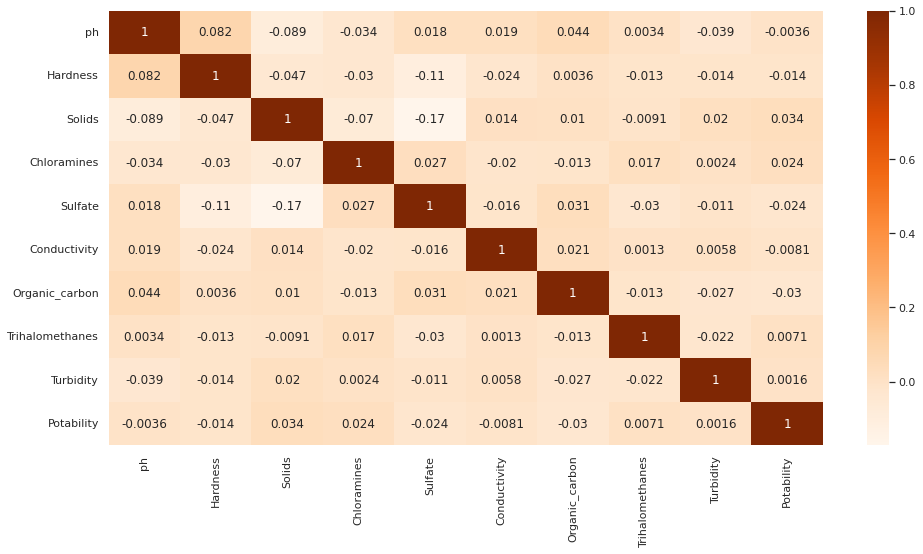

In [16]:

sns.heatmap(
    pandas_df.corr(), annot=True, cmap="Oranges"
)  #

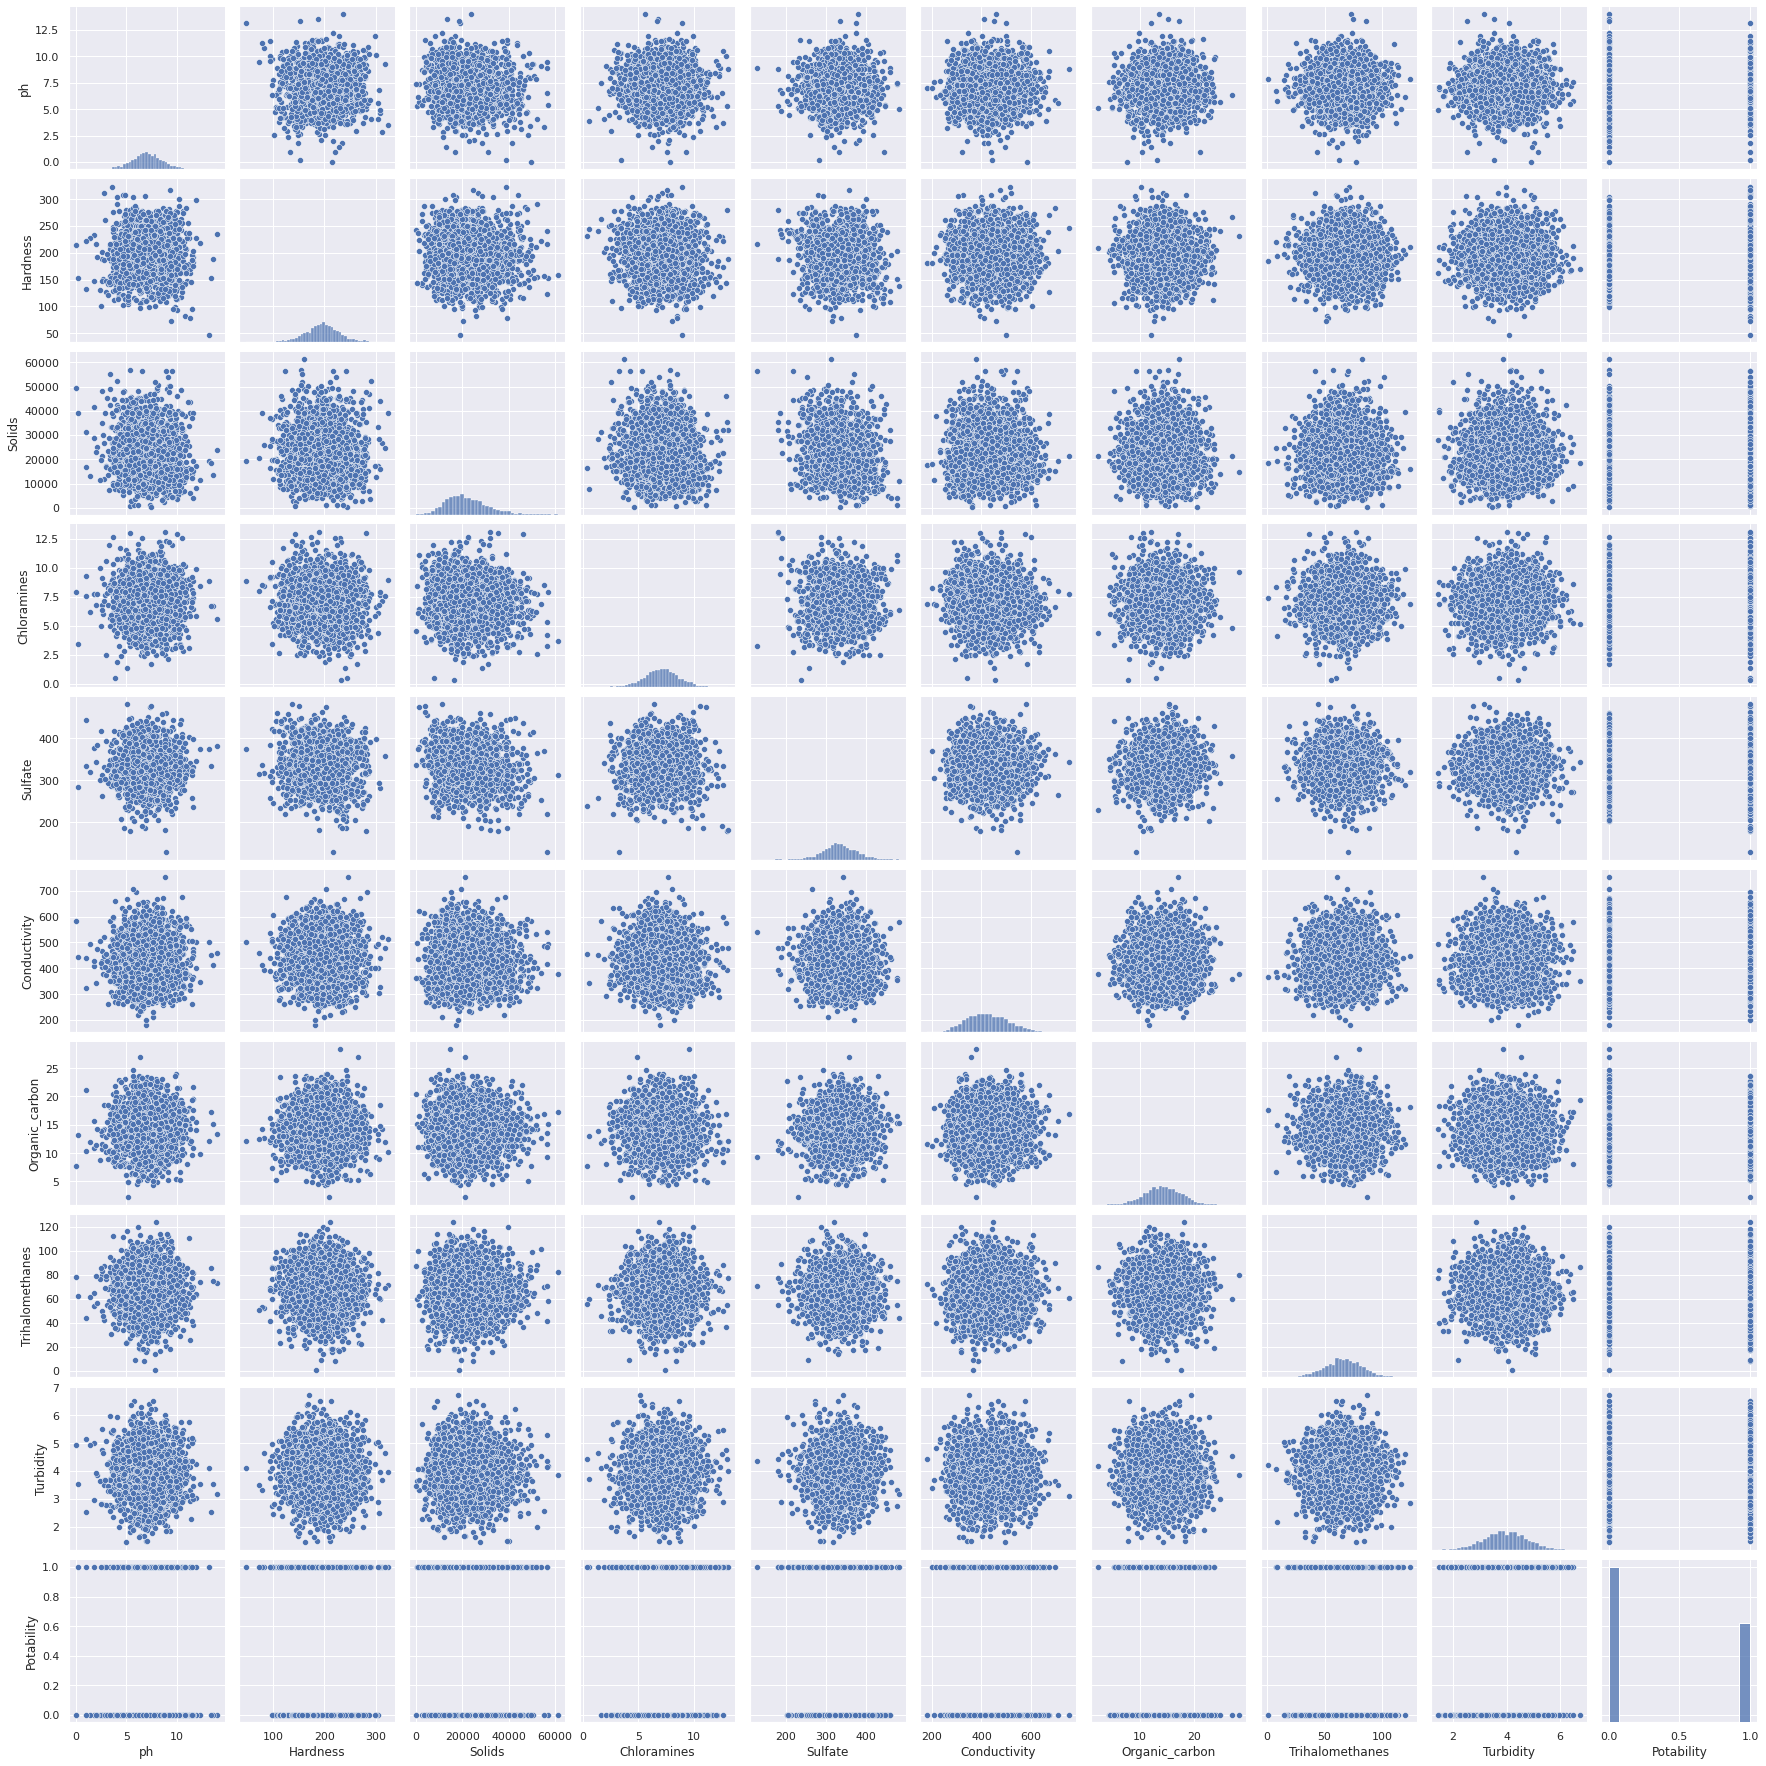

In [17]:
sns.pairplot(
    pandas_df
) 

Interpreting Pairplot:


*   A pair plot shows the pairwise connections between variables in a dataset graphically. For each combination of variables, scatter plots are shown.
*   The scatter plots display the associations between different sets of variables. When two variables are strongly correlated, a strong linear relationship between them can be seen on the scatter plot. If there is no correlation between the factors, a random distribution of points will appear on the scatter plot. The pair plot can be used to find factors that strongly correlate positively or negatively.


*   Variable distribution: The histograms display each variable's distribution. A measure with a normal distribution will have a bell-shaped histogram. A skewed statistic will result in an asymmetric histogram. The pair plot can be used to find outliers or factors with non-normal distributions.

*   Scatter plots can show any outliers in the information that might be present. Data points known as outliers are very different from other data points and can significantly alter statistical models.



*   Patterns and trends: You can spot patterns and trends in the data by looking at the scatter graphs. You might observe, for instance, a nonlinear relationship between two variables or a shift in the relationship between two variables over time.


*   Potential predictors: You can find factors that might be predictors for a statistical model by looking at the scatter plots. Strongly correlated variables with the target variable might make excellent model predictors.









/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


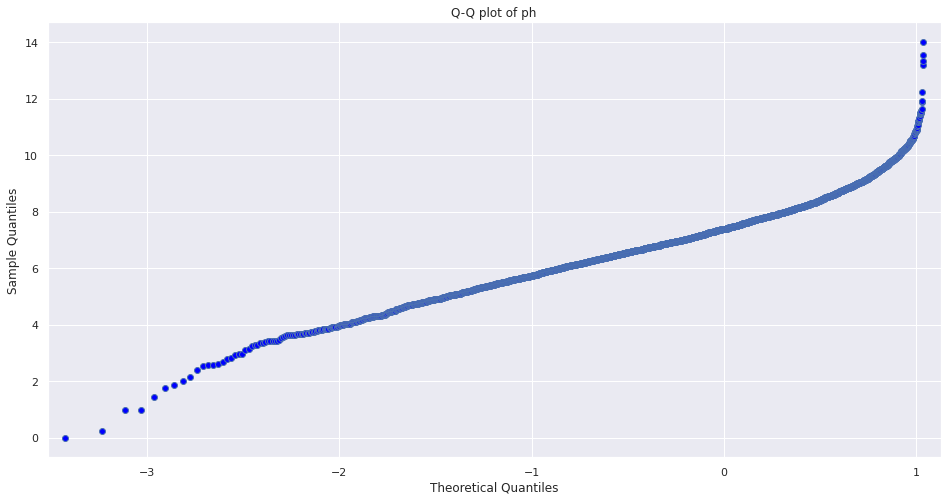

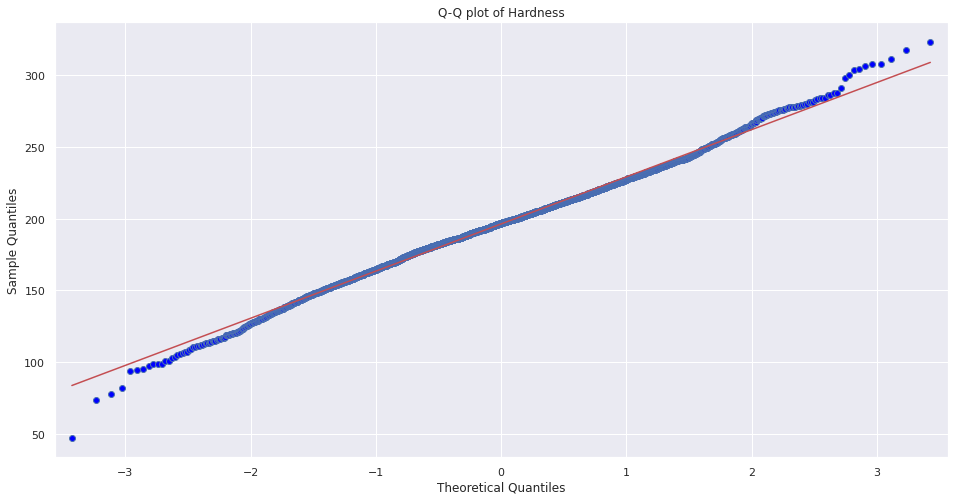

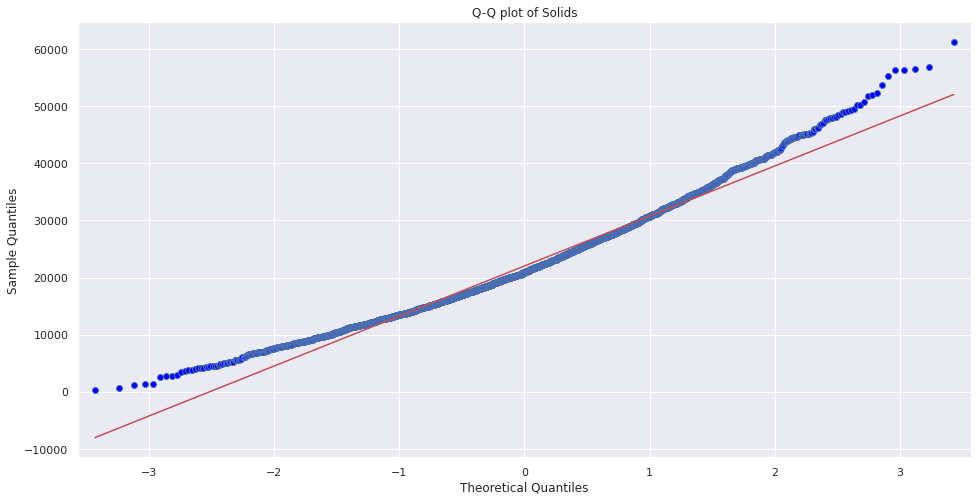

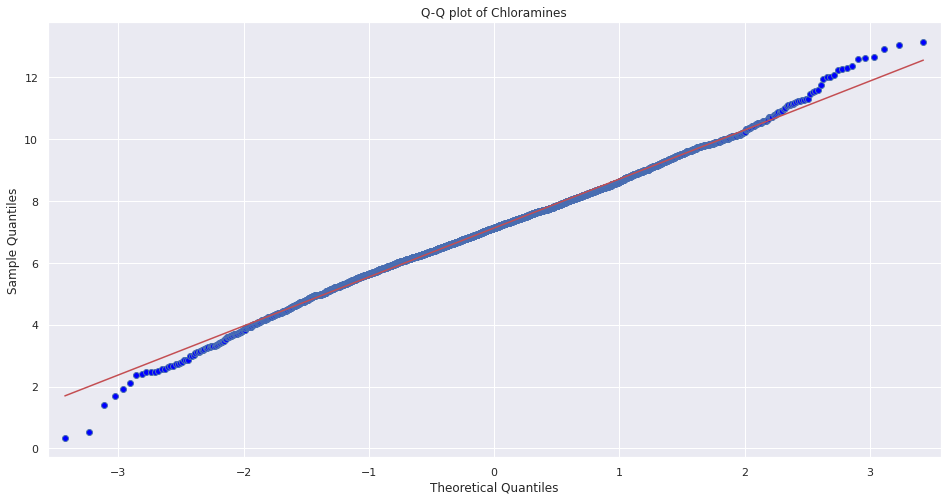

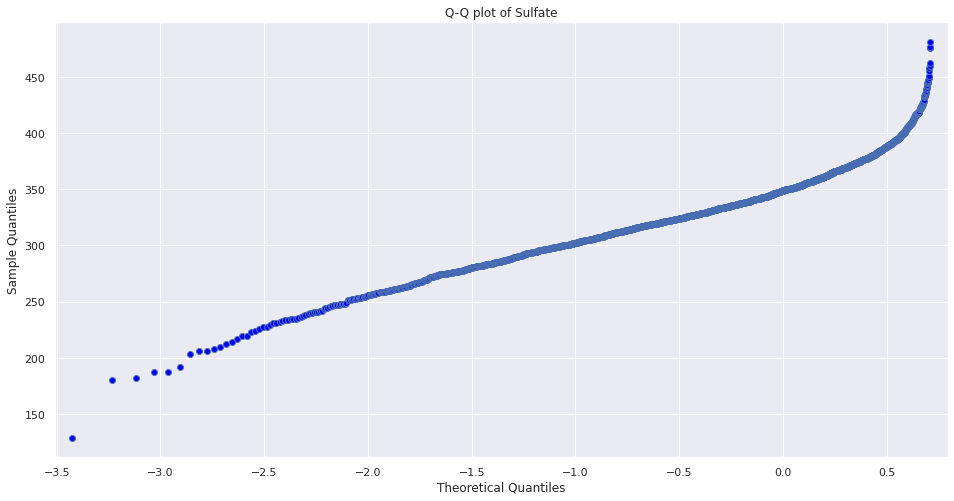

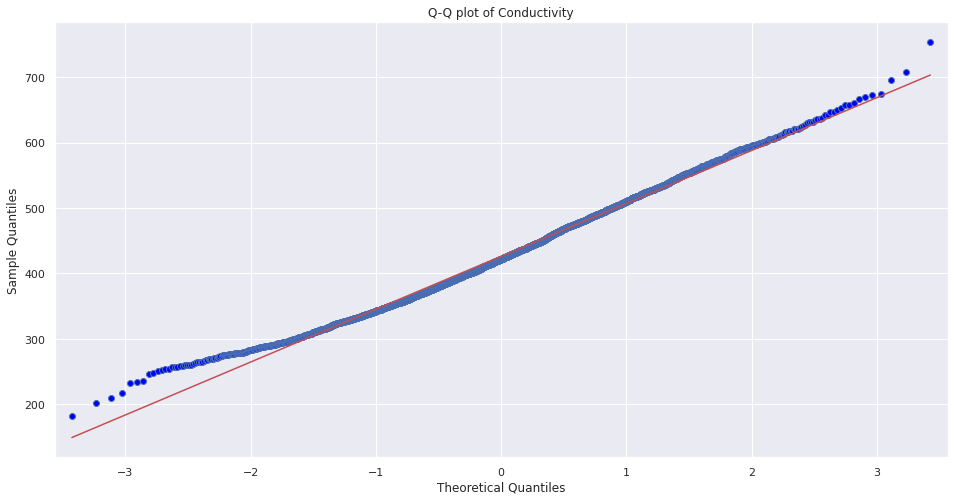

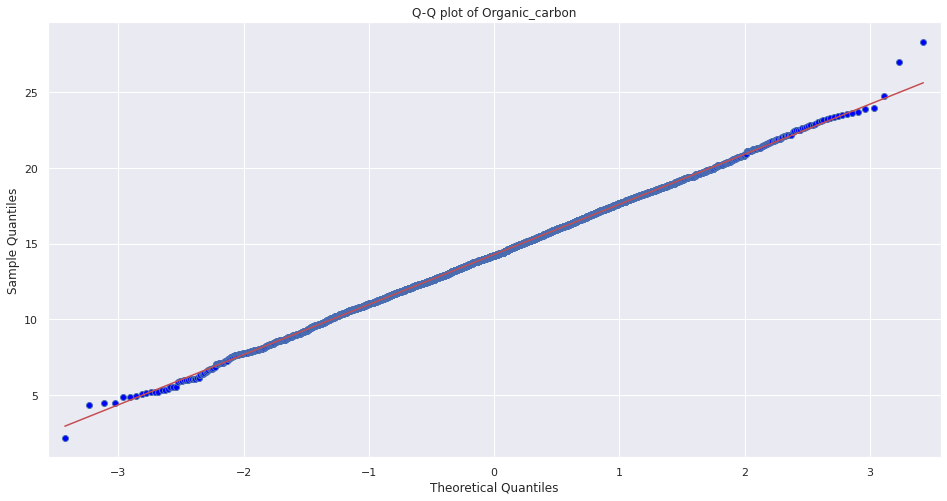

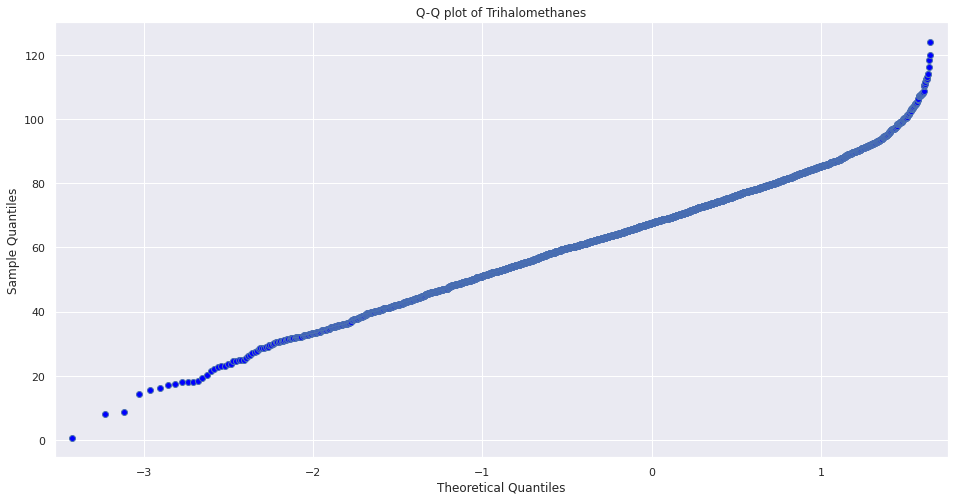

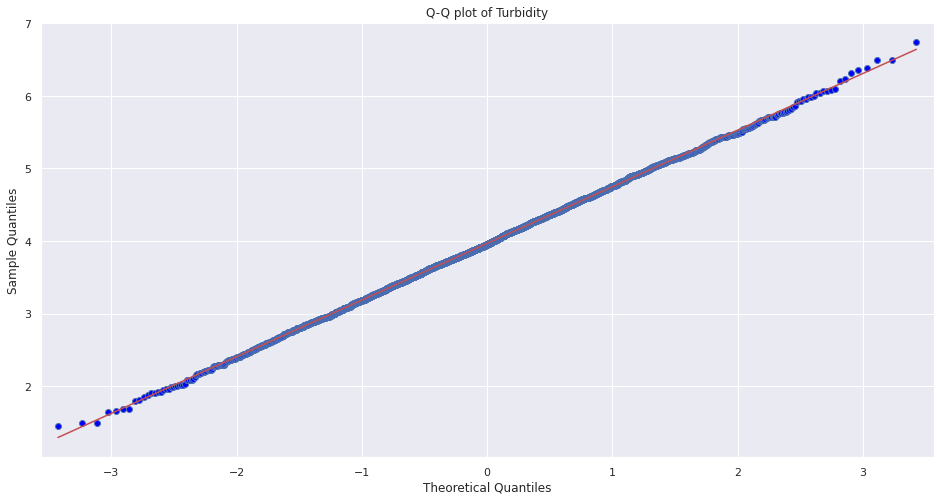

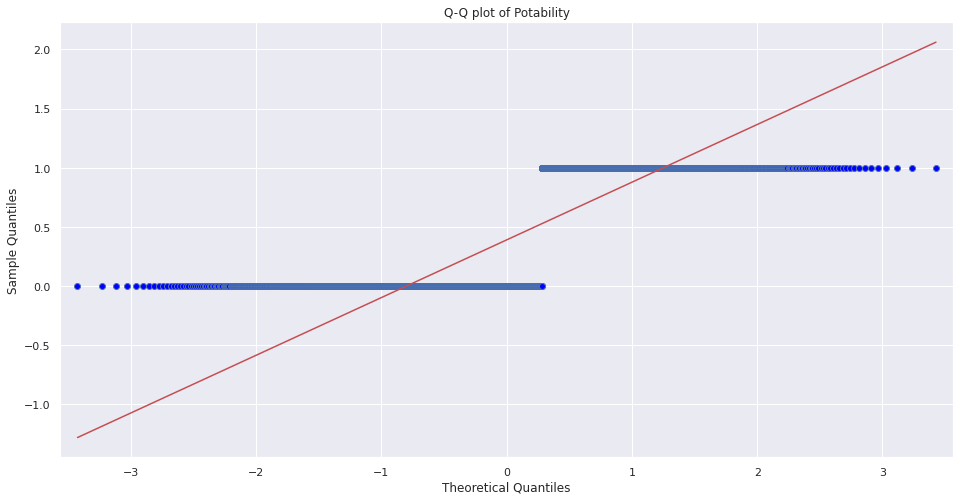

In [18]:
import statsmodels.api as sm
for col in pandas_df.columns:
    sm.qqplot(pandas_df[col], line='s')
    plt.title('Q-Q plot of ' + col)
    plt.show()

1 - ph: The distribution of ph in water is positively skewed.

2 - Hardness: The distribution of hardness is normally distributed.

3 - Solids: The distribution of solids  appears to be normally distrubuted.

4 - Chloramines: The distribution of chloramines appears to be skewed to the right

5 - Sulfate: The distribution of sulfate appears to be skewed positively.

6 - Conductivity: The distribution of conductivity is normally distributed.

7 - Organic carbon: The distribution of organic carbon is normally distributed.

8 - Trihalomethanes: The distribution of trihalomethanes appears to be skewed positively.

9 - Turbidity: The distribution of turbidity is normally distributed

10 - Potability: The distribution of potability in water appears to be approximately normally distributed

In [17]:
df = h2o.H2OFrame(
    pandas_df
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [18]:
df.types 

{'ph': 'real',
 'Hardness': 'real',
 'Solids': 'real',
 'Chloramines': 'real',
 'Sulfate': 'real',
 'Conductivity': 'real',
 'Organic_carbon': 'real',
 'Trihalomethanes': 'real',
 'Turbidity': 'real',
 'Potability': 'int'}

In [19]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [20]:
print(df_train.shape)
print(df_test.shape)

(2590, 10)
(686, 10)


In [21]:
df_train.head()

ph    Hardness    Solids    Chloramines    Sulfate    Conductivity    Organic_carbon    Trihalomethanes    Turbidity    Potability
---------  ----------  --------  -------------  ---------  --------------  ----------------  -----------------  -----------  ------------
  3.71608     129.423   18630.1        6.63525    nan             592.885           15.18              56.3291      4.50066             0
  8.31677     214.373   22018.4        8.05933    356.886         363.267           18.4365           100.342       4.62877             0
 10.2239      248.072   28749.7        7.51341    393.663         283.652           13.7897            84.6036      2.67299             0
nan           118.989   14285.6        7.80417    268.647         389.376           12.706             53.9288      3.59502             0
 11.1803      227.231   25484.5        9.0772     404.042         563.885           17.9278            71.9766      4.37056             0
  7.36064     165.521   32452.6        7.5507     326.624         425.383           15.5868            78.74        3.66229             0
  7.97452     218.693   18767.7        8.11038    nan             364.098           14.5257            76.4859      4.01172             0
  7.11982     156.705   18730.8        3.60604    282.344         347.715           15.9295            79.5008      3.44576             0
  6.34727     186.733   41065.2        9.6296     364.488         516.743           11.5398            75.0716      4.37635             0
  7.05179     211.049   30980.6       10.0948     nan             315.141           20.397             56.6516      4.26843             0
[10 rows x 10 columns]

In [22]:
X = df.columns
print(X)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [23]:
# Set target and predictor variables
y = "Potability"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [24]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [25]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |
02:26:35.982: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
02:26:42.685: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
02:26:43.838: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
02:26:47.853: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
02:26:48.388: _response param, We have detect

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_1_20230301_22635


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       9/12
# GBM base models (used / total)           3/5
# XGBoost base models (used / total)       3/3
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.09032014748674193
RMSE: 0.3005331054754899
MAE: 0.2711692841419828
RMSLE: 0.21377883159166214
Mean Residual Deviance: 0.09032014748674193
R^2: 0.6211339149492406
Null degrees of freedom: 2589
Residual degrees of freedom: 2580
Null deviance: 617.445559845561
Residual deviance: 233.9291819906616
AIC: 1144.7192611254218

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.21030457807144082
RMSE: 0.4585897710061148
MAE: 0.42020210776619793
RMSLE: 0.3224214075903957
Mean Residual Deviance: 0.21030457807144082
R^2: 0.11783500825356419
Null degrees of freedom: 2589
Residual degrees of freedom: 2581
Null deviance: 618.0002875411064
Residual deviance: 544.6888572050317
AIC: 3331.777675373103

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.420243  0.00556444  0.417892      0.418339      0.419132      0.415886      0.429963
mean_residual_deviance  0.210337  0.00511223  0.208252      0.21013       0.209293      0.205169      0.218843
mse                     0.210337  0.00511223  0.208252      0.21013       0.209293      0.205169      0.218843
null_deviance           123.6     1.45227     122.387       123.854       124.775       121.834       125.15
r2                      0.116409  0.0125229   0.104912      0.114215      0.130421      0.128371      0.104127
residual_deviance       108.938   1.94302     109.124       109.688       108.414       106.072       111.391
rmse                    0.458599  0.00554478  0.456346      0.4584        0.457485      0.452956      0.467806
rmsle                   0.322423  0.00173096  0.323483      0.322027      0.32149       0.320344      0.324771

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Understanding the Parameters


*   Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted and actual values. It is calculated by taking the average of the squared differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

*   Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models. The RMSE is a measure of how well the model is able to predict the actual values.

*   Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.


*   Root Mean Squared Logarithmic Error (RMSLE): The RMSLE is a variation of the RMSE that is used for regression models where the target variable has a wide range of values. It is calculated by taking the square root of the average of the squared differences between the logarithm of the predicted and actual values.



*   Mean Residual Deviance: The Mean Residual Deviance is a measure of the goodness of fit for a regression model. It measures the average difference between the predicted and actual values, normalized by the degrees of freedom of the model.

*   R-squared (R^2): The R-squared is a measure of how well the model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables. A value of 1 means that the model explains all the variability in the data, while a value of 0 means that the model explains none of the variability.



*   Null Degrees of Freedom: The Null Degrees of Freedom is the number of observations in the dataset minus 1. It represents the number of observations in the dataset that are free to vary, given the number of parameters in the model.

*   Residual Degrees of Freedom: The Residual Degrees of Freedom is the number of observations in the dataset minus the number of parameters in the model. It represents the number of observations in the dataset that are free to vary after taking into account the number of parameters in the model.



*   Null Deviance: The Null Deviance is the deviance of the null model, which is the model with no independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

*   Residual Deviance: The Residual Deviance is the deviance of the model after accounting for the independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.



*   Akaike Information Criterion (AIC): The AIC is a measure of the quality of a model that takes into account the complexity of the model. It is calculated as the negative log-likelihood of the model plus twice the number of parameters in the model. The AIC can be used to compare the quality of different models, with lower values indicating better quality.

In [26]:
print(
    aml.leaderboard
)  

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20230301_22635     0.45859   0.210305  0.420202  0.322421                  0.210305
StackedEnsemble_AllModels_3_AutoML_1_20230301_22635     0.45882   0.210516  0.41865   0.322429                  0.210516
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_22635  0.459166  0.210834  0.42164   0.322951                  0.210834
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_22635  0.460133  0.211722  0.42292   0.323513                  0.211722
StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_22635  0.46198   0.213425  0.426204  0.324856                  0.213425
StackedEnsemble_AllModels_1_AutoML_1_20230301_22635     0.462013  0.213456  0.425749  0.324897                  0.213456
GBM_grid_1_AutoML_1_20230301_22635_model_26             0.464728  0.215972  0.429484  0.327093                  0.215972
GBM_grid_1_AutoML_1_20230301_226

Based on their rmse scores, the models mentioned in the leaderboard are ranked, with a lower score indicating better performance. The model with the lowest rmse number is shown in the top row of the leaderboard. The performance of various models can be compared using the evaluation metrics, which can then be used to choose the optimal model for a given use case.

In this leaderboard, the best performing model is


*   StackedEnsemble_BestOfFamily_3_AutoML_1_20230226_02306 with am rmse score of 0.455037
*   StackedEnsemble_BestOfFamily_4_AutoML_1_20230226_02306 with am rmse score of  0.455237

The models are then listed in descending order based on their rmse scores.




In [27]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_AllModels_2_AutoML_1_20230301_22635': 0,
 'StackedEnsemble_AllModels_3_AutoML_1_20230301_22635': 1,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_22635': 2,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_22635': 3,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_22635': 4,
 'StackedEnsemble_AllModels_1_AutoML_1_20230301_22635': 5,
 'GBM_grid_1_AutoML_1_20230301_22635_model_26': 6,
 'GLM_1_AutoML_1_20230301_22635': 64}

In [28]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

6


In [29]:
best_model.algo

'gbm'

In [30]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

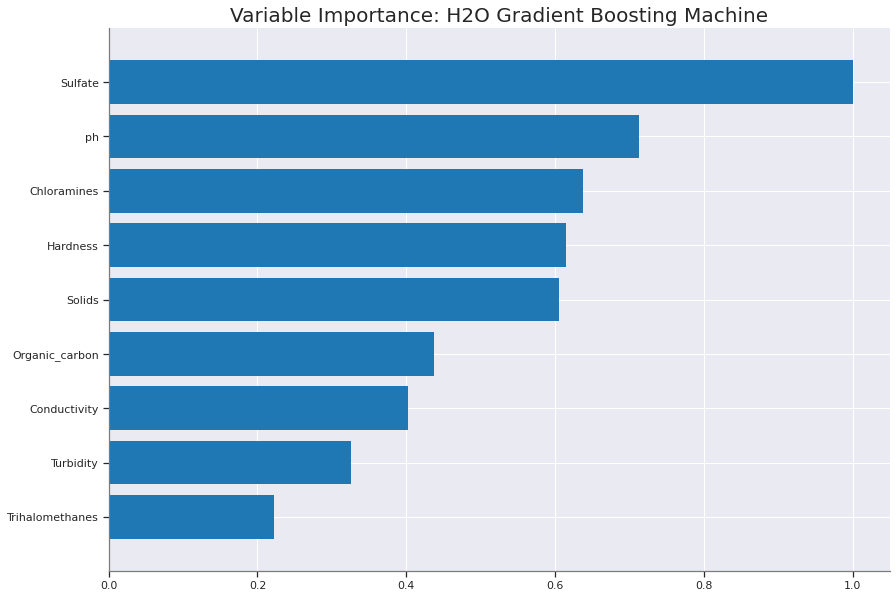

<Figure size 432x288 with 0 Axes>

In [31]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

The above graph is a variable Importance Graph on the H20's Distributed Random Forest Model.


*   We can Interpret that sulphate is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)
*   ph is 0.85 (Think as if it is 85% Important than Alcohol was)
 So On..

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-32-0cab54a0793b>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


64
glm


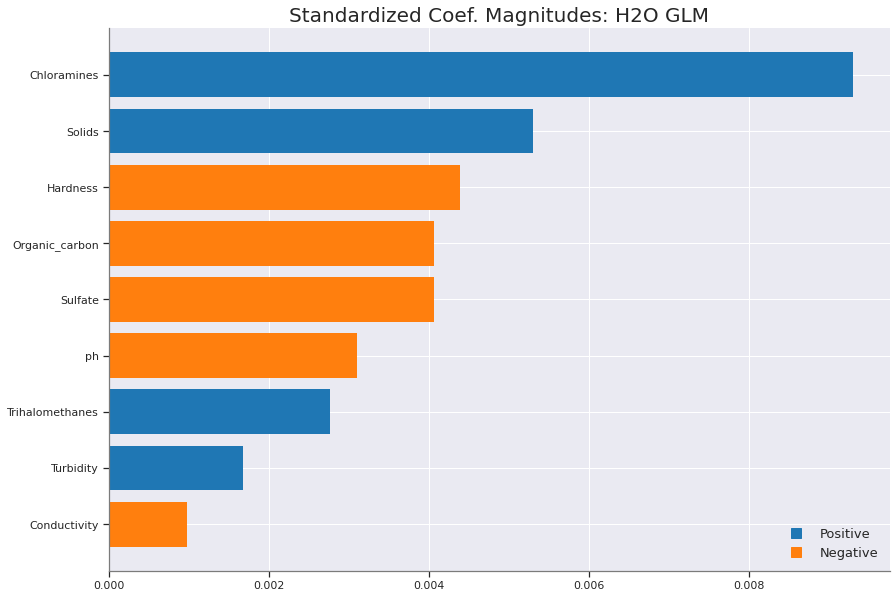

In [32]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

After standardizing all variables to have a mean of zero and a standard variation of one, standardized coefficient magnitudes (also known as standardized coefficients or beta coefficients) are a measurement of the significance of each input variable in a predictive model. Standardized coefficient magnitudes are usually expressed as percentages, but their values can range from -infinity to infinity.

After taking into consideration the scale of the variable, the values on the standardized coefficient magnitudes represent the relative importance of each input variable in the model. A stronger influence on the outcome variable is indicated by a higher magnitude value, whereas a weaker effect is indicated by a lower value.

In [33]:
print(best_model.rmse(train=True))

0.3690482660719845


In [34]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [35]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.21685590652100825,
 'rmse': 0.4656778999705786,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [36]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [37]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

      predict
0    0.264749
1    0.461297
2    0.331707
3    0.206269
4    0.342954
..        ...
681  0.355099
682  0.462972
683  0.449232
684  0.372675
685  0.506497

[686 rows x 1 columns]


In [38]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

Potability
0             0
1             0
2             0
3             0
4             0
..          ...
681           1
682           1
683           1
684           1
685           1

[686 rows x 1 columns]

In [39]:
print(X)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


Regularization
In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting.


*   Regularization methods like Ridge and Lasso are used in linear regression to reduce overfitting and enhance the generalizability of the model.
*   The least-squares objective function of the linear regression model receives a penalty component as a result of ridge regularization. This penalty term reduces the model's coefficients toward zero by having a square relationship with their size. The regularization parameter, a hyperparameter that must be adjusted for optimal performance, determines the severity of the penalty. When there are numerous input variables that are linked with one another, ridge regularization is especially helpful because it can lower the variance of the model by minimizing the impact of these correlated variables.



*   Ridge regularization and Lasso regularization are similar, but Lasso regularization introduces a penalty term proportional to the absolute value of the coefficients rather than the square of the coefficients. Lasso regularization is a useful technique for feature selection because this penalty term has the ability to set some coefficients to precisely zero. Lasso can successfully eliminate pointless variables from the model by setting some coefficients to zero, which can result in a model that is easier to understand and simpler.
*   The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.

In [40]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

water_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
water_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
water_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
water_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

This code is creating two generalized linear regression models using the H2O machine learning platform with different regularization methods: Ridge and Lasso.


*   The first model, "water_glm_regularization_ridge," is using Ridge regularization. The "family" argument is set to "gaussian," which means that the response variable is continuous and the model is using a normal (Gaussian) error distribution. The "alpha" argument is set to 0, which means that the model is using Ridge regularization. The "nfolds" argument is set to 5, which means that the model is using 5-fold cross-validation to evaluate the performance of the model.

*   The second model, "water_glm_regularization_lasso," is using Lasso regularization. The "family" and "nfolds" arguments are the same as in the Ridge model, but the "alpha" argument is set to 1, which means that the model is using Lasso regularization.
*   This code creates a generalized linear regression model using H2O with the option of performing lambda search for L1 and L2 regularization.

In [41]:
water_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677637345074_24


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              9                             9                              1                       py_2_sid_a88f

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.23735302899216681
RMSE: 0.4871889048327833
MAE: 0.47470605798433374
RMSLE: 0.3427754736453571
Mean Residual Deviance: 0.23735302899216681
R^2: 0.004374822545526791
Null degrees of freedom: 2589
Residual degrees of freedom: 2580
Null deviance: 617.445559845561
Residual deviance: 614.744345089712
AIC: 3647.146320600799

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.23928300638931507
RMSE: 0.48916562265690244
MAE: 0.4763555653848469
RMSLE: 0.3441704351703364
Mean Residual Deviance: 0.23928300638931507
R^2: -0.003720857112230025
Null degrees of freedom: 2589
Residual degrees of freedom: 2580
Null deviance: 617.5305655514137
Residual deviance: 619.742986548326
AIC: 3668.1211039013106

Cross-Validation Metrics Summary: 
                        mean         sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.476392     0.00205953  0.47756       0.477528      0.473857      0.474526      0.478491
mean_residual_deviance  0.239348     0.00279773  0.240225      0.242215      0.235977      0.236829      0.241496
mse                     0.239348     0.00279773  0.240225      0.242215      0.235977      0.236829      0.241496
null_deviance           123.506      6.38267     132.578       118.019       124.798       125.368       116.767
r2                      -0.00417467  0.00635476  -0.000636615  -0.0082071    0.000992071   0.000386372   -0.013408
residual_deviance       123.949      5.78505     132.604       118.927       124.596       125.282       118.333
rmse                    0.489226     0.00286128  0.490128      0.492153      0.485775      0.48665       0.491422
rmsle                   0.344202     0.00107244  0.34383       0.344429      0.34339       0.343398      0.345964

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ------------------  -------------------  -------------------  --------------------
    2023-03-01 02:32:09  0.000 sec   0             617.4455598455672          0.23839596905234256
    2023-03-01 02:32:09  0.010 sec   1                                                             0.4871889048327833  0.23735302899216681  0.47470605798433374  0.004374822545526791

Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
Chloramines      0.0220655              1                    0.268804
Solids           0.0120052              0.54407              0.146248
Sulfate          0.0109704              0.497173             0.133642
Hardness         0.00973077             0.440994             0.118541
Organic_carbon   0.00911951             0.413292             0.111095
Trihalomethanes  0.00633692             0.287186             0.0771969
ph               0.00620383             0.281155             0.0755756
Turbidity        0.003394               0.153814             0.041346
Conductivity     0.00226159             0.102494            

# Ridge Regularization

In [42]:
water_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677637345074_25


GLM Model: summary
    family    link      regularization               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 2.185E-5 )  9                             9                              1                       py_2_sid_a88f

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.23735302899265404
RMSE: 0.48718890483328336
MAE: 0.474706102761439
RMSLE: 0.34277547394399865
Mean Residual Deviance: 0.23735302899265404
R^2: 0.004374822543483092
Null degrees of freedom: 2589
Residual degrees of freedom: 2580
Null deviance: 617.445559845561
Residual deviance: 614.744345090974
AIC: 3647.146320606115

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.23948586088808382
RMSE: 0.4893729261903276
MAE: 0.47663291352127735
RMSLE: 0.3442880984713086
Mean Residual Deviance: 0.23948586088808382
R^2: -0.004571771242930955
Null degrees of freedom: 2589
Residual degrees of freedom: 2580
Null deviance: 617.9141219608323
Residual deviance: 620.2683797001371
AIC: 3670.315871435961

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.4766       0.0026001    0.474764      0.480133      0.473581      0.478037      0.476485
mean_residual_deviance  0.239453     0.00344521   0.236988      0.243467      0.235299      0.242279      0.239232
mse                     0.239453     0.00344521   0.236988      0.243467      0.235299      0.242279      0.239232
null_deviance           123.583      6.01548      127.04        131.423       115.499       121.338       122.615
r2                      -0.00614801  0.0070409    -0.0022567    -0.0048528    -0.0185938    -0.00217783   -0.00285895
residual_deviance       124.054      5.65417      127.262       131.716       116.944       121.382       122.965
rmse                    0.489329     0.00352034   0.486814      0.493424      0.485076      0.492218      0.489114
rmsle                   0.344295     0.000928723  0.343932      0.344388      0.345811      0.34333       0.344011

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse        training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -------------------  -------------------  -----------------  --------------------
    2023-03-01 02:32:19  0.000 sec   0             617.4455598455672          0.23839596905234256
    2023-03-01 02:32:19  0.008 sec   1                                                             0.48718890483328336  0.23735302899265404  0.474706102761439  0.004374822543483092

Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
Chloramines      0.022065               1                    0.268804
Solids           0.012005               0.544071             0.146249
Sulfate          0.0109701              0.49717              0.133641
Hardness         0.00973057             0.440995             0.118541
Organic_carbon   0.00911933             0.413293             0.111095
Trihalomethanes  0.00633679             0.287187             0.0771969
ph               0.00620374             0.281157             0.0755761
Turbidity        0.00339394             0.153815             0.0413462
Conductivity     

The regularization appears to have helped in reducing the cross-validation metrics.

The mean squared error (Improved by 0.2%),
root mean squared error (Improved by 0.47%),
mean absolute error(Improved by 0.43%),
and root mean squared logarithmic error are all lower in the model with regularization compared to the model without regularization. Additionally, the residual deviance and AIC are also lower in the model with regularization. The R-squared value is slightly higher in the model with regularization, which means that the regularization helped the model to better generalize to new data.

# Lasso Regularization

In [43]:
water_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677637345074_26


GLM Model: summary
    family    link      regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 2.185E-5 )  9                             9                              1                       py_2_sid_a88f

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.23735304611094138
RMSE: 0.487188922401712
MAE: 0.47471336243916495
RMSLE: 0.34277565536440857
Mean Residual Deviance: 0.23735304611094138
R^2: 0.004374750737372368
Null degrees of freedom: 2589
Residual degrees of freedom: 2580
Null deviance: 617.445559845561
Residual deviance: 614.7443894273382
AIC: 3647.14650740113

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.23891746986096873
RMSE: 0.4887918471711335
MAE: 0.4761297865316772
RMSLE: 0.34390271689008006
Mean Residual Deviance: 0.23891746986096873
R^2: -0.002187540379571251
Null degrees of freedom: 2589
Residual degrees of freedom: 2580
Null deviance: 617.9978353975771
Residual deviance: 618.796246939909
AIC: 3664.161510216936

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.476225     0.00363732   0.482332      0.473788      0.473169      0.475637      0.476199
mean_residual_deviance  0.239062     0.00495515   0.247282      0.236315      0.234282      0.238677      0.238753
mse                     0.239062     0.00495515   0.247282      0.236315      0.234282      0.238677      0.238753
null_deviance           123.6        4.66984      121.236       118.742       130.621       121.611       125.788
r2                      -0.00379158  0.00518744   -0.00855191   0.00480697    -0.00398994   -0.00709114   -0.0041319
residual_deviance       123.759      4.87008      121.168       118.157       130.729       122.441       126.3
rmse                    0.488918     0.0050449    0.497275      0.486122      0.484027      0.488545      0.488624
rmsle                   0.34389      0.000784065  0.344039      0.342515      0.344125      0.344416      0.344352

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse      training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -----------------  -------------------  -------------------  --------------------
    2023-03-01 02:32:28  0.000 sec   0             617.4455598455672          0.23839596905234256
    2023-03-01 02:32:28  0.006 sec   1                                                             0.487188922401712  0.23735304611094138  0.47471336243916495  0.004374750737372368

Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
Chloramines      0.0220223              1                    0.269544
Solids           0.0119693              0.54351              0.1465
Sulfate          0.0109135              0.495568             0.133578
Hardness         0.00968832             0.439933             0.118582
Organic_carbon   0.00908053             0.412334             0.111142
Trihalomethanes  0.00629199             0.28571              0.0770117
ph               0.00616528             0.279957             0.0754608
Turbidity        0.00335414             0.152307             0.0410534
Conductivity     0.0022164

Which Regularization Method Helps ?
The Lasso regularization appears to have decreased the MSE, RMSE, MAE, and RMSLE values compared to the non-regularized and Ridge regularized models, indicating worse performance. The R-squared value also decreased, indicating a worse fit to the data.

So based on these metrics, it seems that Lasso did help in this case and performed better than Ridge. However, it's always a good practice to try multiple regularization techniques and compare their performance using different metrics, as the optimal regularization method can depend on the specific dataset and modeling task.

Here, we can observe that after applying the lasso regularization, there is a slight improvement in the evaluation metrics on the cross validation data, hence it can be concluded that lasso  regularization helps us avoid the overfitting of model and improvements of metrics on the validation dataset.

In [44]:
lambda_search = water_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [45]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677637345074_27


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.005645 )  nlambda = 100, lambda.max = 0.04371, lambda.min = 0.005645, lambda.1se = -1.0  9                             8                              23                      py_2_sid_a88f

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.23741998323949529
RMSE: 0.48725761486045066
MAE: 0.4751711114573513
RMSLE: 0.34283333843240815
Mean Residual Deviance: 0.23741998323949529
R^2: 0.004093969443879852
Null degrees of freedom: 2589
Residual degrees of freedom: 2581
Null deviance: 617.445559845561
Residual deviance: 614.9177565902928
AIC: 3645.876823376915

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       alpha    iterations    training_rmse        training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------  ------------  -------------------  -------------------  ------------------  --------------------
     2023-03-01 02:32:39  0.000 sec   1            .44E-1    1             0.23839596905233976  0.5
     2023-03-01 02:32:39  0.003 sec   2            .4E-1     2             0.2383163638429167   0.5
     2023-03-01 02:32:39  0.004 sec   3            .36E-1    2             0.2382499122095721   0.5
     2023-03-01 02:32:39  0.005 sec   4            .33E-1    2             0.2381944671487229   0.5
     2023-03-01 02:32:39  0.005 sec   5            .3E-1     2             0.23814822576114325  0.5
     2023-03-01 02:32:39  0.007 sec   6            .27E-1    2             0.2381096756244447   0.5
     2023-03-01 02:32:39  0.008 sec   7            .25E-1    3             0.23805383040385772  0.5
     2023-03-01 02:32:39  0.010 sec   8            .23E-1    3             0.23799732136213286  0.5
     2023-03-01 02:32:39  0.013 sec   9            .21E-1    3             0.23795026896700014  0.5
     2023-03-01 02:32:39  0.020 sec   10           .19E-1    5             0.2378887404704308   0.5
---  ---                  ---         ---          ---       ---           ---                  ---      ---           ---                  ---                  ---                 ---
     2023-03-01 02:32:39  0.039 sec   14           .13E-1    7             0.23766038130081302  0.5
     2023-03-01 02:32:39  0.040 sec   15           .12E-1    8             0.2376133834894349   0.5
     2023-03-01 02:32:39  0.042 sec   16           .11E-1    8             0.23757233025695906  0.5
     2023-03-01 02:32:39  0.043 sec   17           .99E-2    8             0.2375381670028185   0.5
     2023-03-01 02:32:39  0.044 sec   18           .9E-2     8             0.2375095496400401   0.5
     2023-03-01 02:32:39  0.048 sec   19           .82E-2    8             0.23748585500237     0.5
     2023-03-01 02:32:39  0.049 sec   20           .75E-2    9             0.23746607431038425  0.5
     2023-03-01 02:32:39  0.050 sec   21           .68E-2    9             0.23744786215108196  0.5
     2023-03-01 02:32:39  0.050 sec   22           .62E-2    9             0.2374326035297308   0.5
     2023-03-01 02:32:39  0.051 sec   23           .56E-2    9             0.23741998323949556  0.5      23            0.48725761486045066  0.23741998323949529  0.4751711114573513  0.004093969443879852
[23

Above parameters are from a lambda search, which means that the model was trained on a range of different values of the regularization parameter lambda to find the value that minimized the selected loss function. Based on the reported metrics, it seems that the optimal value of lambda resulted in a slightly improved model compared to the non-regularized model. The MSE, RMSE, and MAE all decreased slightly, indicating that the model is making slightly more accurate predictions on the training data. The R^2 value, which measures how well the model fits the data, decreased slightly, which may indicate that the model is not overfitting the training data as much. Overall, the lambda search seems to have resulted in a slightly improved model.

In [46]:
coeff_table = water_glm._model_json["output"]["coefficients_table"]

In [47]:
coeff_table.as_data_frame()

names  coefficients  std_error   z_value   p_value  \
0        Intercept      0.441949   0.165560  2.669426  0.007646   
1               ph     -0.003861   0.006531 -0.591197  0.554440   
2         Hardness     -0.000294   0.000293 -1.003212  0.315853   
3           Solids      0.000001   0.000001  1.227454  0.219764   
4      Chloramines      0.014182   0.006193  2.290021  0.022100   
5          Sulfate     -0.000263   0.000271 -0.972363  0.330961   
6     Conductivity     -0.000028   0.000118 -0.235369  0.813941   
7   Organic_carbon     -0.002747   0.002896 -0.948480  0.342974   
8  Trihalomethanes      0.000391   0.000608  0.643211  0.520144   
9        Turbidity      0.004428   0.012543  0.353009  0.724110   

   standardized_coefficients  
0                   0.392278  
1                  -0.006204  
2                  -0.009731  
3                   0.012005  
4                   0.022066  
5                  -0.010970  
6                  -0.002262  
7                  -0.009120  
8                   0.006337  
9                   0.003394

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_22635  0.454978  0.207005  0.418105  0.322809                  0.207005                 710                   0.088602  StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230301_22635     0.457077  0.208919  0.418535  0.323908                  0.208919                 950                   0.209927  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_22635  0.457372  0.209189  0.420784  0.324255                  0.209189                 393                   0.076225  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230301_22635     0.457431  0.209243  0.420157  0.324124                  0.209243                 791                   0.097833  StackedEnsemble
GBM_4_AutoML_1_20230301_22635                           0.458137  0.209889  0.423008  0.324184                  0.209889                 323                   0.01343   GBM
StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_22635  0.459704  0.211328  0.424395  0.324833                  0.211328                 385                   0.07516   StackedEnsemble
GBM_grid_1_AutoML_1_20230301_22635_model_12             0.460072  0.211666  0.429136  0.324649                  0.211666                 192                   0.0104    GBM
StackedEnsemble_AllModels_1_AutoML_1_20230301_22635     0.46068   0.212226  0.425105  0.32542                   0.212226                 401                   0.090496  StackedEnsemble
GBM_grid_1_AutoML_1_20230301_22635_model_5              0.463853  0.21516   0.421008  0.327873                  0.21516                  443                   0.016136  GBM
DeepLearning_grid_1_AutoML_1_20230301_22635_model_1     0.463995  0.215291  0.417469  0.326843                  0.215291                4208                   0.01204   DeepLearning
DRF_1_AutoML_1_20230301_22635                           0.464436  0.215701  0.430381  0.328929                  0.215701                1376                   0.029492  DRF
XGBoost_grid_1_AutoML_1_20230301_22635_model_29         0.465127  0.216343  0.43172   0.328545                  0.216343                 162                   0.002344  XGBoost
GBM_2_AutoML_1_20230301_22635                           0.465247  0.216455  0.433989  0.328123                  0.216455                 446                   0.013694  GBM
DeepLearning_grid_1_AutoML_1_20230301_22635_model_2     0.465337  0.216539  0.434851  0.327422                  0.216539                 116                   0.004362  DeepLearning
XRT_1_AutoML_1_20230301_22635                           0.465415  0.216611  0.430438  0.3294                    0.216611                 910                   0.02873   DRF
GBM_grid_1_AutoML_1_20230301_22635_model_25             0.465663  0.216842  0.433355  0.329187                  0.216842                 229                   0.015171  GBM
GBM_grid_1_AutoML_1_20230301_22635_model_26             0.465678  0.216856  0.430633  0.328295                  0.216856                 239                   0.019199  GBM
DeepLearning_1_AutoML_1_20230301_22635                  0.466257  0.217395  0.427519  0.331626                  0.217395                 525                   0.003969  DeepLearning
GBM_grid_1_AutoML_1_20230301_22635_model_29             0.466585  0.217702  0.437059  0.33021                   0.217702                 183                   0.013773  GBM
GBM_grid_1_AutoML_1_20230301_22635_model_2              0.466681  0.217791  0.443443  0.33002                   0.217791                 155                   0.008999  GBM
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

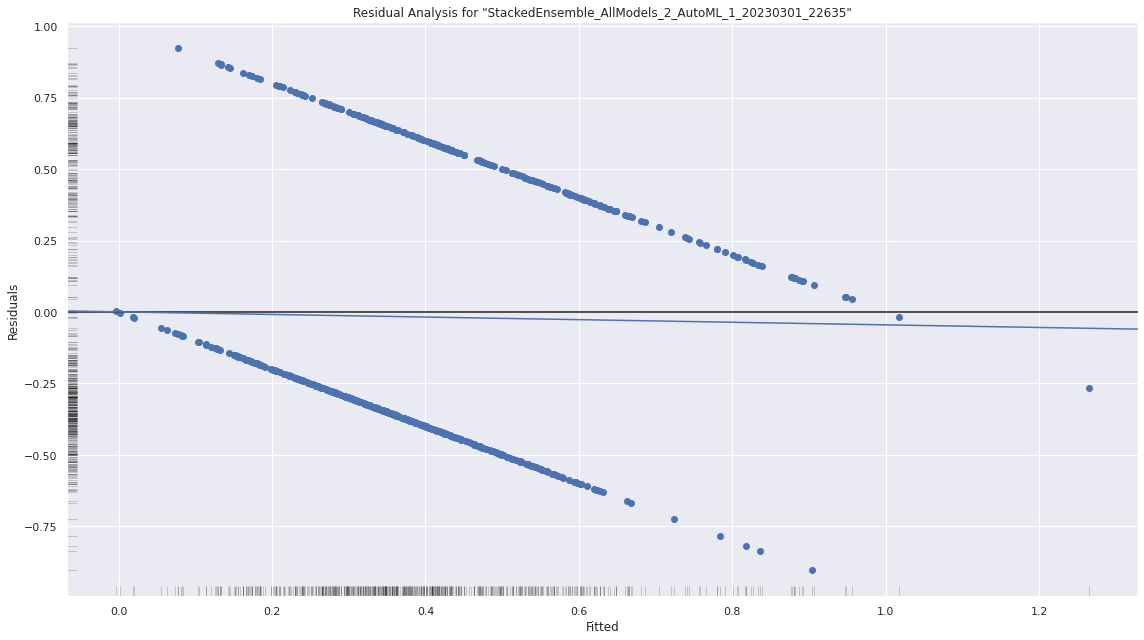

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

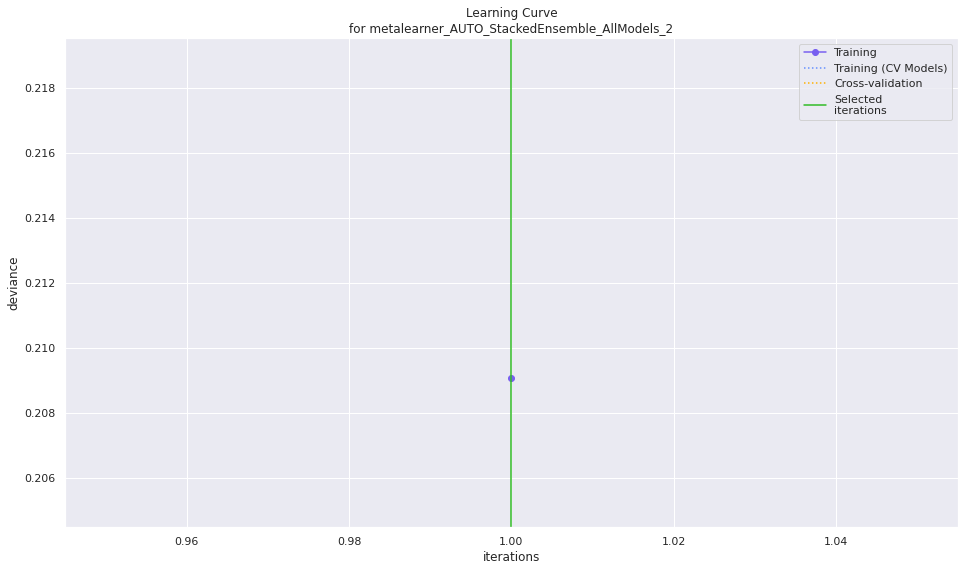

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

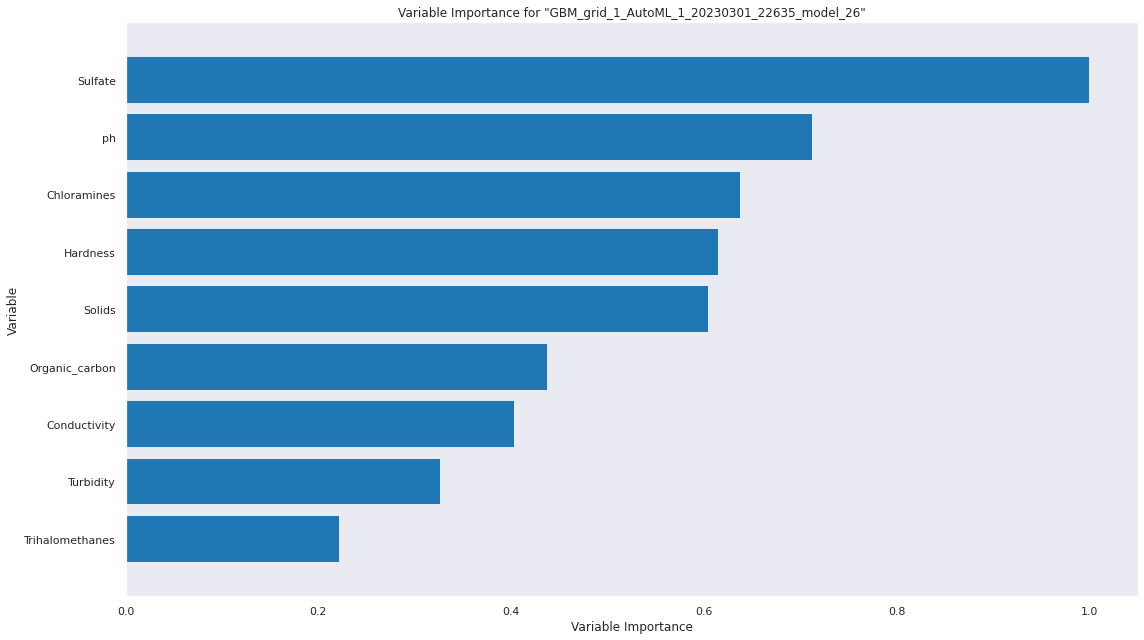

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

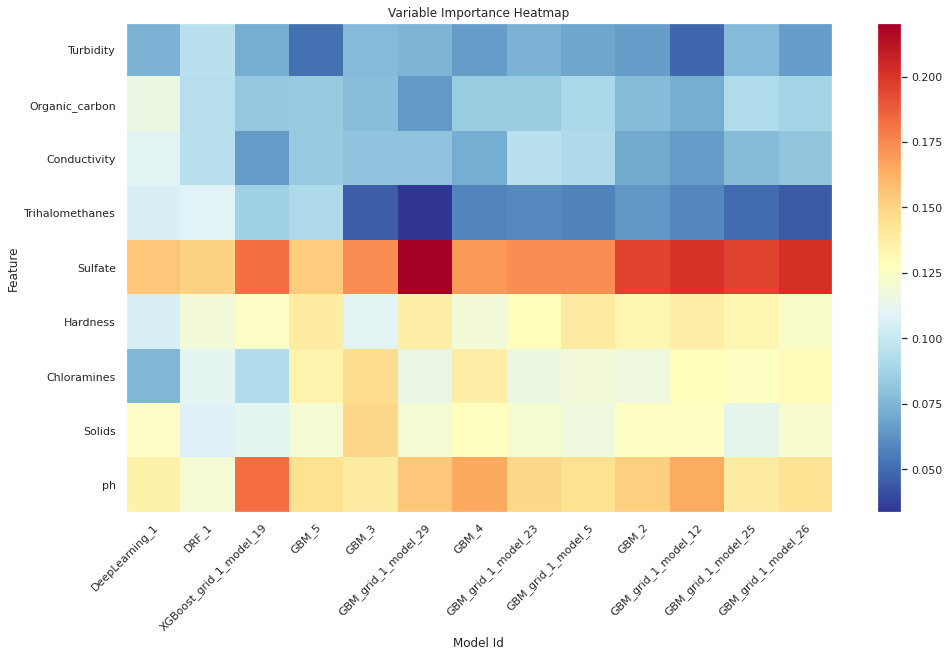

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

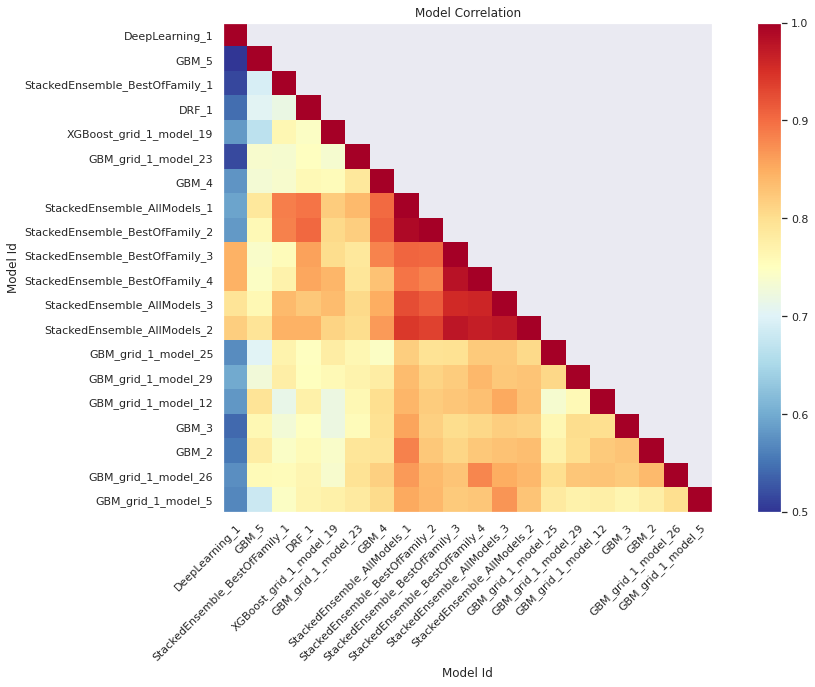

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

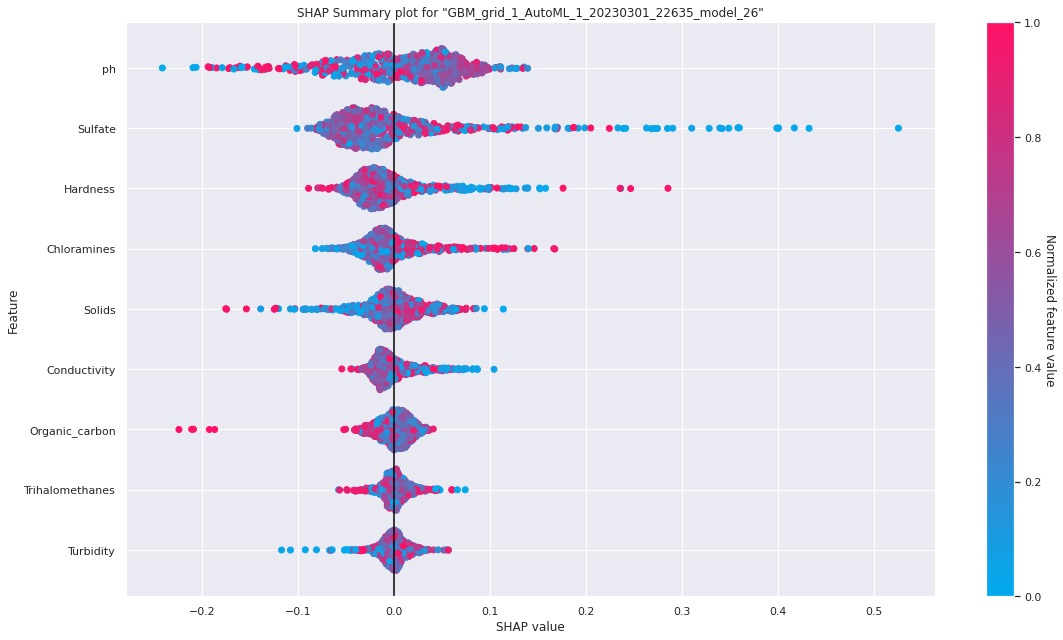

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

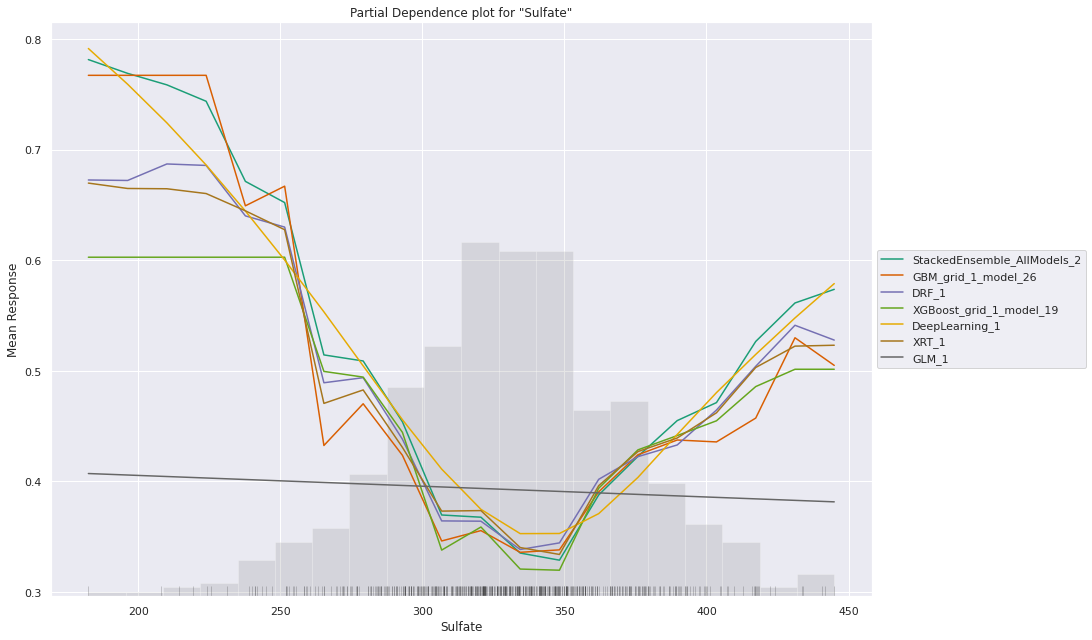

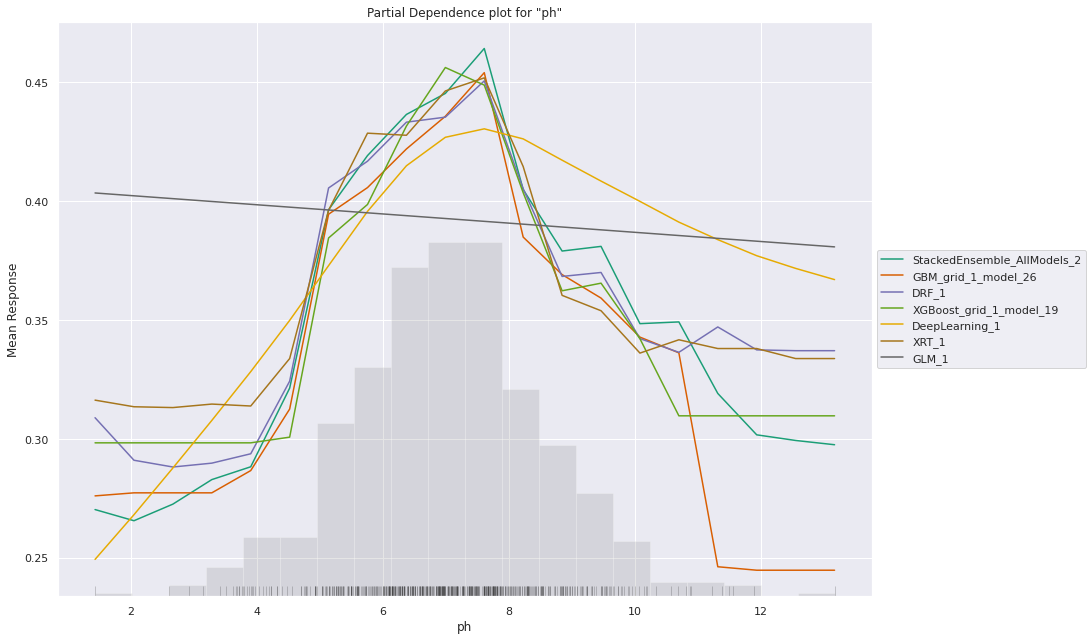

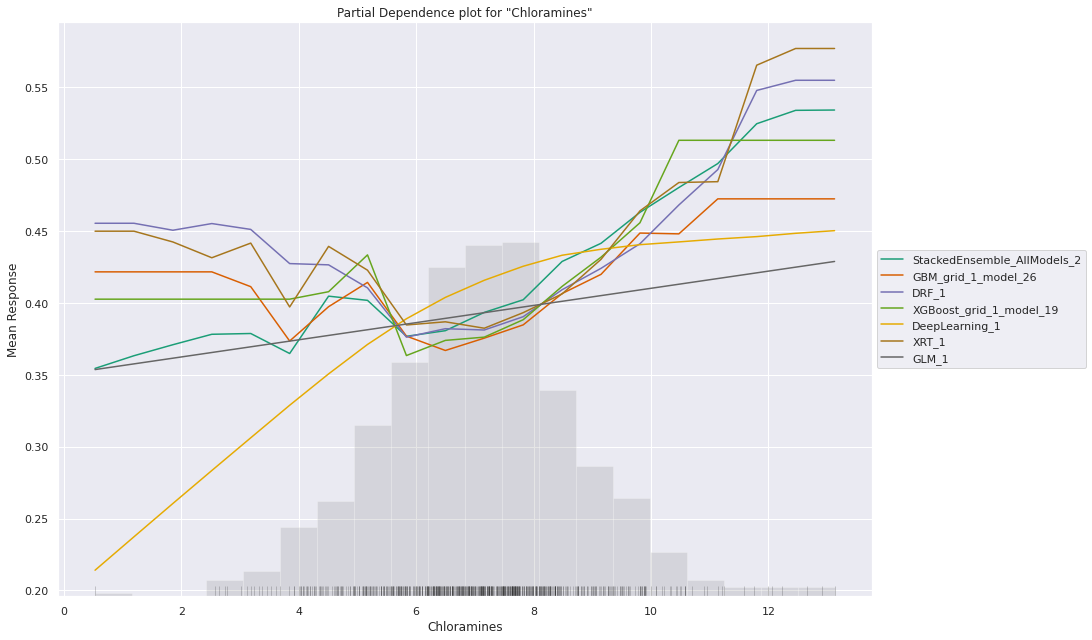

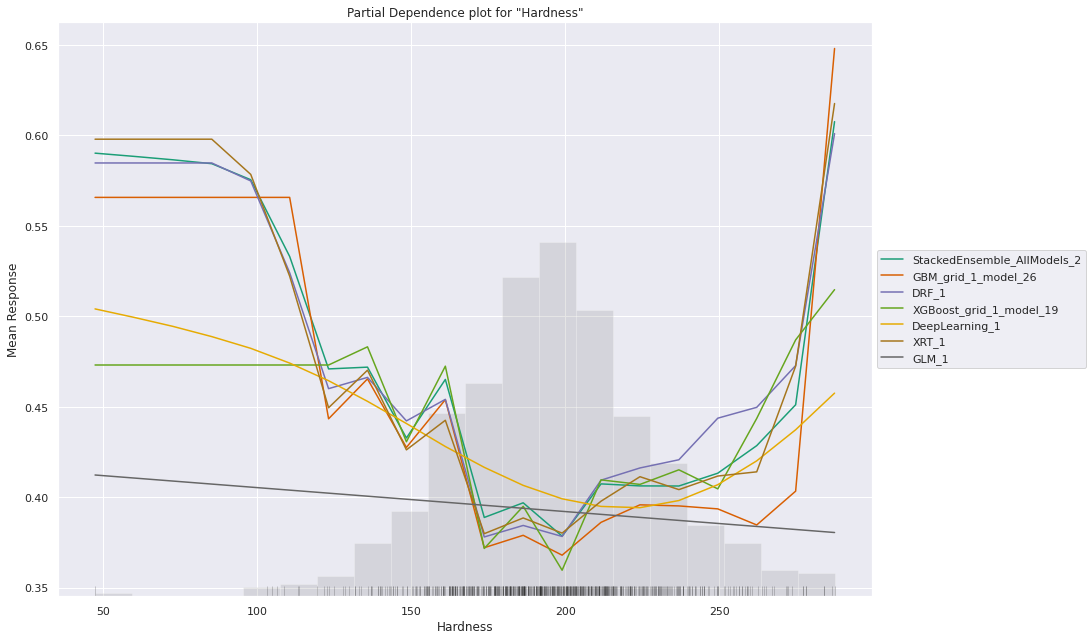

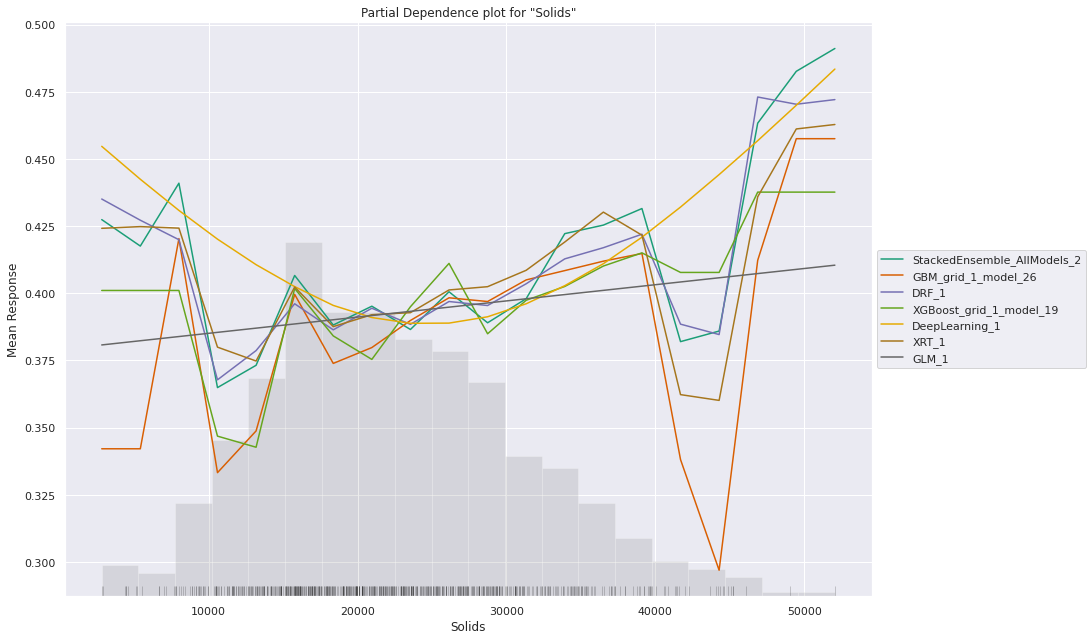

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

/usr/local/lib/python3.8/dist-packages/h2o/explanation/_explain.py:1714: UserWarning: Original observation of "sulfate" for 40th Percentile is [nan, 0.23083825984017925]. Plotting of NAs is not yet supported.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/h2o/explanation/_explain.py:1714: UserWarning: Original observation of "sulfate" for 100th Percentile is [nan, 0.5299025900205221]. Plotting of NAs is not yet supported.
  warnings.warn(msg)


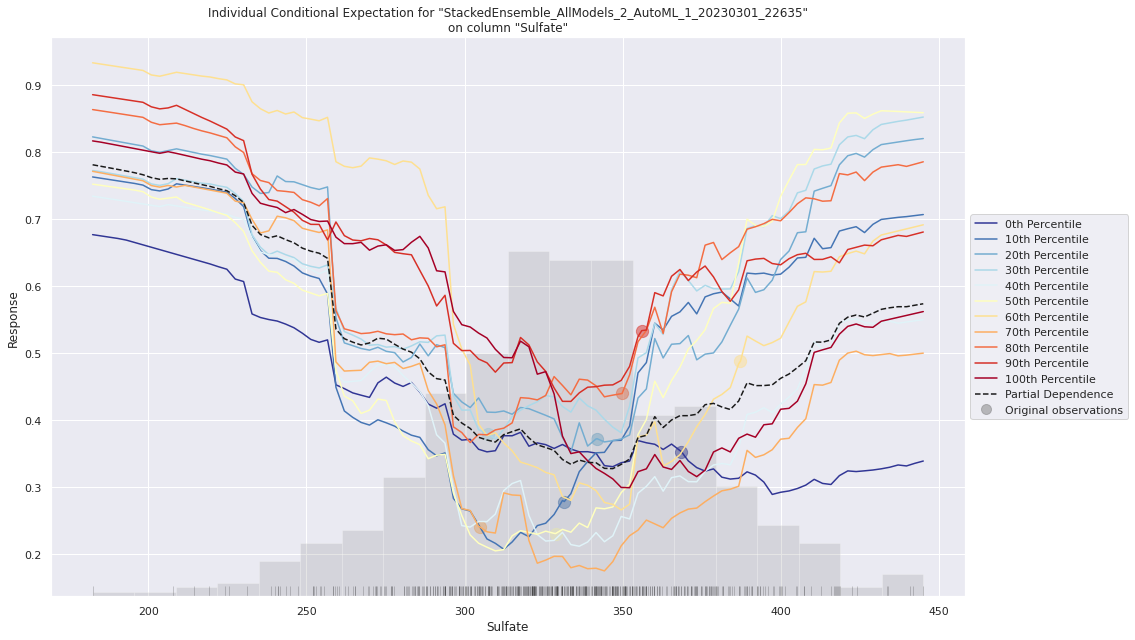

/usr/local/lib/python3.8/dist-packages/h2o/explanation/_explain.py:1714: UserWarning: Original observation of "ph" for 0th Percentile is [nan, 0.352631775365193]. Plotting of NAs is not yet supported.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/h2o/explanation/_explain.py:1714: UserWarning: Original observation of "ph" for 40th Percentile is [nan, 0.23083825984017925]. Plotting of NAs is not yet supported.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/h2o/explanation/_explain.py:1714: UserWarning: Original observation of "ph" for 70th Percentile is [nan, 0.2398724751875816]. Plotting of NAs is not yet supported.
  warnings.warn(msg)


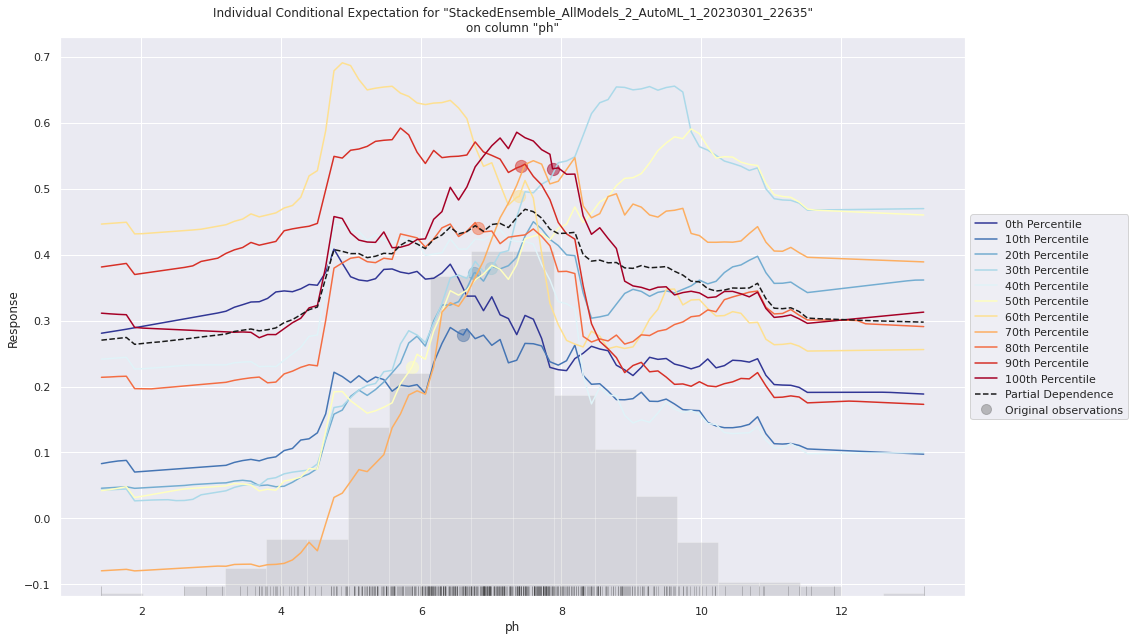

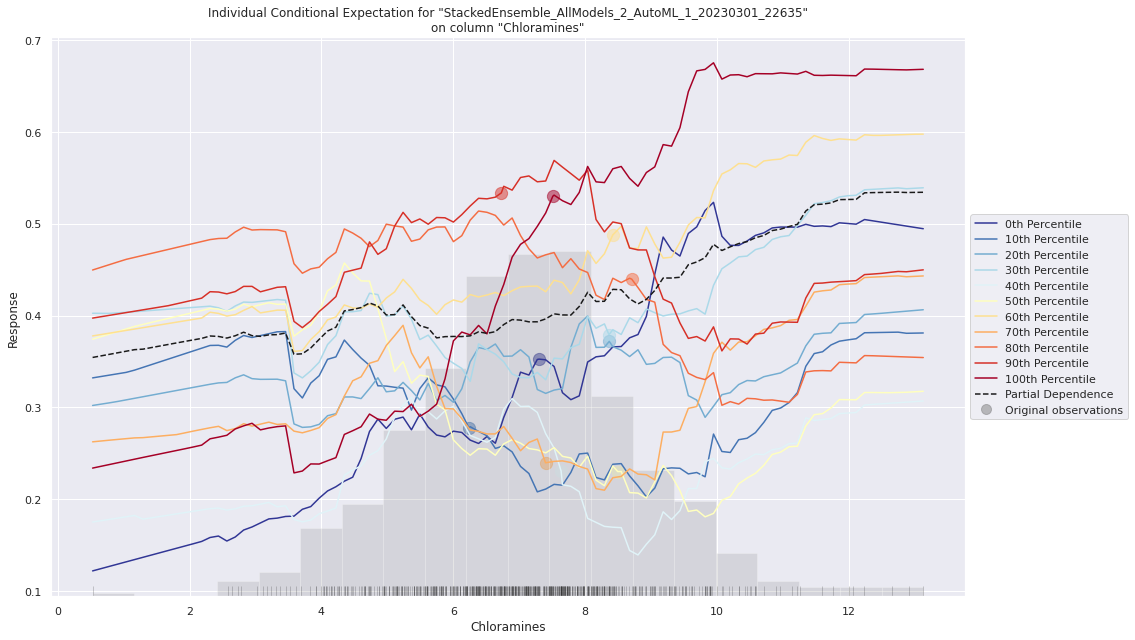

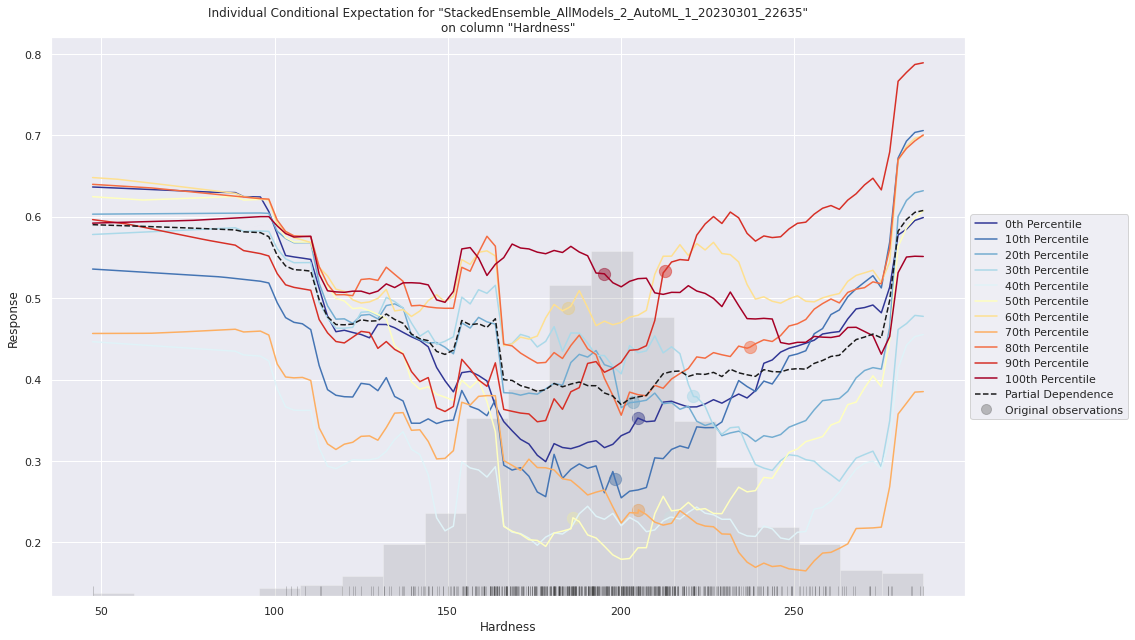

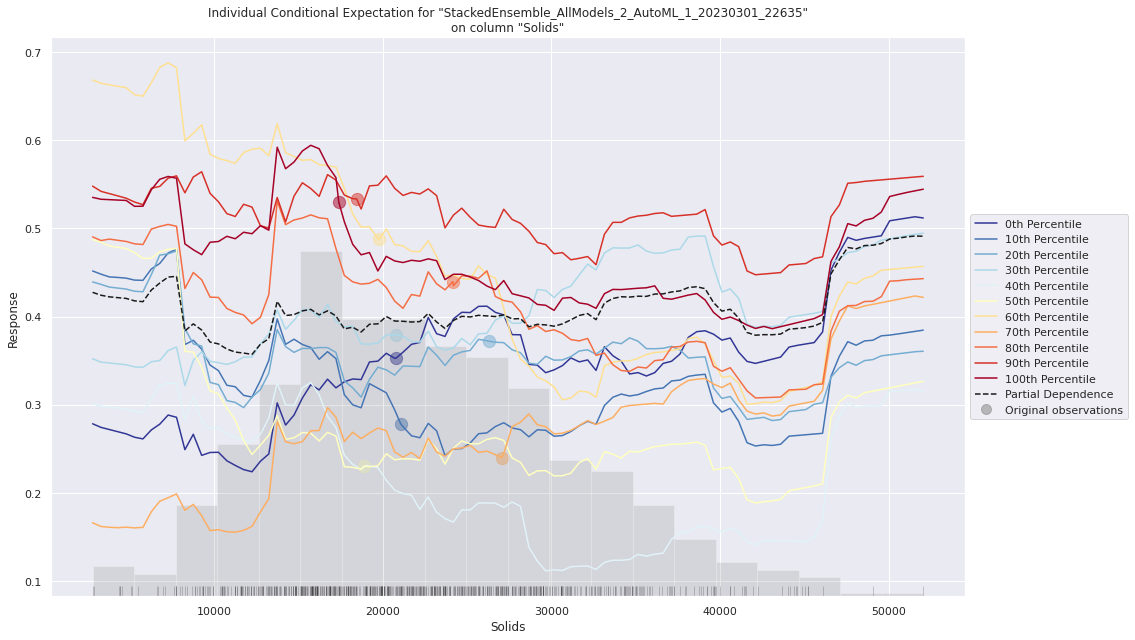

In [48]:
exa = aml.explain(df_test)

# Interpreting Best Model from AutoML
## Residual Analysis
Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.


*   Here, the residuals are visible as striped lines, which is an artifact of using an integer value as the response value rather than an actual value. The image below also shows that residuals have a normal distribution. Remainders denote the absence of heteroscedasticity in the residuals.

## Variable Importance

The variable importance plot shows the relative importance of the most important variables in the model.
Foe potability of water sulphate is the most important variable followed by ph and so on.

## SHAP Summary
SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.


1.   All the features are listed as per their importance in making the prediction, that is ph is more significant followed by sulphate, and so on. Hence, free_sulphur_dioxide is the least significant predictor in our model.
2.  The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see Alcohol has the most impact on the quality of the wine. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result.  As we can see the distribution of red points in the sulphate feature is far more spread than the blue points. From this visual, we can interpret that the potability of water vastly depends on ph and sulphate. It doesn't have much impact if the content is low i.e. between the shap value of 0.4 to 0.6 the blue data points are pretty concentrated. Let us analyze the distribution of SHAP values of this feature. As seen in the SHAP plot we can see that extreme values on both ends can have a significant effect on the potability of water.

The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

# Partial Dependence Plot (PDP)

A partial dependence plot shows the marginal effect of a feature on the target(water potability in our dataset). It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP.

For Interpretation purposes, let us pick up the two most important variables - ph and Sulphate.

1. As we can see that when the rest of the variables are kept constant and a marginal change is made in sulphate. This could be interpreted as this range of sulphate could be the deciding factor in the quality of the water potability. 2. Similarly when the rest of the variables are kept constant and a marginal change is made in ph we can observe the mean response of quality going up between the sulfate range of 0.37 to 0.55. Hence, it can be interpreted that this range is deciding factor in the potability of water.

The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value

## ICE (Individual Conditional Expectation) Plot
ICE plot is similar to what we did in the PDP plot, but the fundamental difference between the two methods is that the PDP plot focuses on the average effect of a feature and does not focus on a specific instance. ICE plot comes in rescue to address this drawback of the PDP plot where the outputs from all instances are considered instead of an average value.Individual conditional expectation curves are even more intuitive to understand than partial dependence plots. One line represents the predictions for one instance if we vary the feature of interest.






In [52]:
import statsmodels.formula.api as smf  # OLS model Library

In [53]:
import h2o

pandas_df = h2o.as_list(df)

In [56]:
results = smf.ols(
    "Potability ~ ph + Hardness + Solids + Chloramines + Sulfate + Conductivity + Organic_carbon + Trihalomethanes + Turbidity",
    data=pandas_df,
).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Potability   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8118
Date:                Sun, 26 Feb 2023   Prob (F-statistic):              0.605
Time:                        00:39:53   Log-Likelihood:                -1417.6
No. Observations:                2011   AIC:                             2855.
Df Residuals:                    2001   BIC:                             2911.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2875      0.180      1.600      0.110      -0.065       0.640
ph                  0.0063      0.007      0.893      0.372      -0.008       0.020
Hardness         -8.73e-06      0.000     -0.026      0.980      -0.001       0.001
Solids           2.371e-06   1.29e-06      1.832      0.067   -1.66e-07    4.91e-06
Chloramines         0.0069      0.007      0.995      0.320      -0.007       0.020
Sulfate         -9.925e-05      0.000     -0.366      0.715      -0.001       0.000
Conductivity    -9.216e-05      0.000     -0.679      0.497      -0.000       0.000
Organic_carbon     -0.0021      0.003     -0.650      0.516      -0.009       0.004
Trihalomethanes     0.0003      0.001      0.423      0.673      -0.001       0.002
Turbidity           0.0141      0.014      1.000      0.317      -0.014       0.042
==============================================================================
Omnibus:                     8135.640   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.564
Skew:                           0.394   Prob(JB):                     6.09e-73
Kurtosis:                       1.170   Cond. No.                     3.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Assumptions



*   Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. Here no heteroscadasticity is observed in the residual plot, hence this assumption is not violated.
*   Here the Durbin- Watson value is .039 , which signifies that there is no autocorrelation in our data, hence this assumption is also not violated




*   If we look at the Correlation Heatmap closely - we can see that there is little to no collinearity among the variables.
*   If we look closely at the Pair-Plot - we can notice that every independent variable has linear relationship with the target variable.



*   Based on the distributions I described earlier, it is possible that some of the variables violate the assumption of normality. For example, sulphate,ph and hardness all have positively skewed distributions, which could lead to non-normality of the residuals in a linear regression model.

# Interpreting Regression Co-efficients

## Model Co-efficients

The positive or negative value of a co-eficient tells us if there is a positve or a negtive correlationship between the target and predictors. A positive value indicates that the value of target increases if the value of co-efficient increases and vice-versa. Whereas the negative values indicates that the value of target increases if the value of co-efficient decreases and vice versa.

High absolute values of co-efficients can be used to get an idea of the importance of variables in a linear regression. Here, as stated above ph and Sulphates seems to be the most important variables to predict target i.e. potability of water.
## Skew and Kurtosis

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as 0.394, 1.710 respectively.

## Durbin-Watson

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

Value of 2 indicates that no auto correlation is detected
Value between 0 to 2 indicates that there is positive auto correlation detected
Value between 2 to 4 indicates that there is negatibe auto correlation detected
Our model has a DW score of .039 which could be interpreted as a positive auto-correlation in the residuals of regression.

## Jarque-Bera Test

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 332.564 which again re-inforces the interpretation we got from Skew and Kurtosis.

Hyperparameter Tuning - Random Grid Search on GBM Model












In [57]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [58]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [59]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [60]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [61]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.21652728265358745
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.21700112847944605
     0.9                  0.07          4.0          0.9                 gbm_grid2_model_17  0.2181018773781714
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   0.21860115358328375
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.21902029732567216
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.21918473296713323
     0.7000000000000001   0.03          6.0          1.0                 gbm_grid2_model_6   0.21924695129362465
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.2202148909076354
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.22025674075618207
     0.8                  0.03          5.0          0.5                 gbm_grid2_model_12  0.2203210507702419
---  ---                  ---           ---          ---                 ---                 ---
     0.5                  0.05          2.0          0.8                 gbm_grid2_model_27  0.22724633758485502
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.22757333576286265
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.2277604533518038
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.2280347535215326
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.22866565484989557
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.22868135397848957
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.2291956263185321
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.2296474884498455
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.2297578308771869
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.23106729999126224
[36 rows x 7 columns]

In [62]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [63]:
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.21652728265358745
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.21700112847944605
     0.9                  0.07          4.0          0.9                 gbm_grid2_model_17  0.2181018773781714
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   0.21860115358328375
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.21902029732567216
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.21918473296713323
     0.7000000000000001   0.03          6.0          1.0                 gbm_grid2_model_6   0.21924695129362465
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.2202148909076354
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.22025674075618207
     0.8                  0.03          5.0          0.5                 gbm_grid2_model_12  0.2203210507702419
---  ---                  ---           ---          ---                 ---                 ---
     0.5                  0.05          2.0          0.8                 gbm_grid2_model_27  0.22724633758485502
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.22757333576286265
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.2277604533518038
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.2280347535215326
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.22866565484989557
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.22868135397848957
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.2291956263185321
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.2296474884498455
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.2297578308771869
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.23106729999126224
[36 rows x 7 columns]

In [64]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [65]:
models = gbm_gridperf2.models

In [66]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [67]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [68]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [69]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.9        0.03         10          0.5           0.216527
1               0.8        0.03          9          0.9           0.217001
2               0.9        0.07          4          0.9           0.218102
3               0.5        0.05          7          0.9           0.218601
4               0.5        0.01         10          1.0           0.219020
5               0.3        0.03          8          1.0           0.219185
6               0.7        0.03          6          1.0           0.219247
7               0.6        0.01          9          0.8           0.220215
8               0.8        0.06          9          0.6           0.220257
9               0.8        0.03          5          0.5           0.220321
10              0.4        0.08          6          0.9           0.220521
11              0.9        0.04          4          0.9           0.220584
12              0.6      

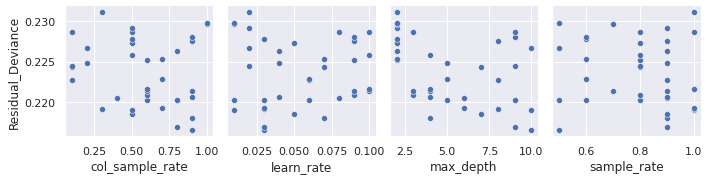

In [70]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# Hyperparameter Tuning Analysis
This is a summary of hyperparameter tuning for an XGBoost model, which involved a grid search over a range of values for four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. The search resulted in a total of 36 combinations of hyperparameters, and for each combination, the Residual Deviance was calculated as an evaluation metric.

Based on the results, the hyperparameter combination with the lowest Residual Deviance was a model with col_sample_rate of 0.22, learn_rate of 0.03, max_depth of 10, and sample_rate of 1.0, with a Residual Deviance of 0.2165. 

Overall, the results suggest that the combination of col_sample_rate, learn_rate, max_depth, and sample_rate can have a significant impact on the performance of an XGBoost model, and that hyperparameter tuning can lead to significant improvements in model performance.


## Answers for questions
1. Is the relationship significant?
A: yes, because the R-sqaured is 0.04  which is moderate  and all features' p value is 0 , so the relationship is very much significant

2. Are any model assumptions violated?
A: no, the dependent variable is 0/1, so the question is a classification question which make sense to all models in AutoML.

3. Is there any multicollinearity in the model?
A: yes, from the data, we could know that all other variables have more or less correlationship with each other, may be because they are all about the condition of potability.

4. In the multivariate models are predictor variables independent of all the other predictor variables?
A: No, they are not all independent of each other, we can know that from the correlation heat map.

1.features like ph and hardness that describe the water potability  have a strong correlation with each other


5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
A: the most significant predictor variable is ph , potability and sulphate, however, potability is actually the number of data, so ph and sulphate should be the most significant predictor variable.

6. Does the model make sense?
A: yes, the question is a classification question and models in AutoML can deal with it.

7. Does regularization help?**
Yes, the rmse from the best model which is LASSO is 0.48620.

8. Which independent variables are significant?
the most significant predictor variable is ph and sulphate, can varify from variable importance automl.

9. Which hyperparameters are important?
all hyperparameters are important because they determined the way model works, however, there are some more important one, such as booster,max_depth, ntrees in XGBOOST and learn_rate in GBM.

10. Coding professionalism?
yes.

## Conclusion


*   To predict the potability of water using specific attributes, a predictive model was built using H2O AutoML.
*   Examined how the GLM Model is affected by LASSO and Ridge regularization.
*   Used SHAP summary to research the significance of variables.
*   Applied the Random Grid Search Method to the setting of the hyperparameters.

References:

https://rstudio-pubs-static.s3.amazonaws.com/64286_2635bf8b05fb4423ac2968243211b46b.html
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

MIT License

Copyright (c) 2023 Vaishnavi Narendra Bhoite and AISkunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.